In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
import math
df=pd.read_csv('Metazygia monitor 1.csv', index_col=0)
df['Date_Time'] = df.index
dfdark=df.iloc[7200:]
dflight=df.iloc[:7200]
#df['Date_Time'] = df.index
column=df.columns[1:-1]
#print(column)
df1=df.copy()
columns=df1.columns[1:-1]
dfcos=dfdark.loc[:,['lights','Monitor 1 Spider 21']]
dfcos['test']='Spider'
dfcos['real']=dfdark['Monitor 1 Spider 21']
dfcos['y']=dfcos['real'].rolling(window=60).mean()
dfcos['x']=range(0,len(dfcos.real))
#dfcos=dfcos.drop(columns=['lights', 'Monitor 1 Spider 21'])
dfcos=dfcos.dropna()
dff = pd.read_csv('Metazygia monitor 1_DD.csv', index_col=0)
dfdark = dfdark.drop(columns = ['lights', 'Date_Time'])
display(dfdark)

Monitor 1 Spider 1  Monitor 1 Spider 2  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                  11                   0   
2017-04-26 00:02:00                   4                   0   
2017-04-26 00:03:00                   4                   0   
2017-04-26 00:04:00                   1                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 3  Monitor 1 Spider 4  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                   0                   0   
2017-04-26 00:02:00                   0                   0   
2017-04-26 00:03:00                   0                   0   
2017-04-26 00:04:00                   0                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 5  Monitor 1 Spider 6  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                   0                   0   
2017-04-26 00:02:00                   0                   0   
2017-04-26 00:03:00                   0                   0   
2017-04-26 00:04:00                   0                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 7  Monitor 1 Spider 8  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                   0                   0   
2017-04-26 00:02:00                   0                   0   
2017-04-26 00:03:00                   0                   0   
2017-04-26 00:04:00                   0                   0   
...                                 ...                 ...   
2017-05-04 23:55:00                   0                   0   
2017-05-04 23:56:00                   0                   0   
2017-05-04 23:57:00                   0                   0   
2017-05-04 23:58:00                   0                   0   
2017-05-04 23:59:00                   0                   0   

                     Monitor 1 Spider 9  Monitor 1 Spider 10  ...  \
Date_Time                                                     ...   
2017-04-26 00:00:00                   0                    0  ...   
2017-04-26 00:01:00                   0                    0  ...   
2017-04-26 00:02:00                   0                    0  ...   
2017-04-26 00:03:00                   0                    0  ...   
2017-04-26 00:04:00                   0                    0  ...   
...                                 ...                  ...  ...   
2017-05-04 23:55:00                   0                    0  ...   
2017-05-04 23:56:00                   0                    0  ...   
2017-05-04 23:57:00                   0            

In [43]:
#from gatspy.periodic import periodogram_auto
from gatspy.periodic import LombScargleFast
    
time = range(len(dfcos.x))
##Use rolling average to find period:
#move = dfcos['y'].values
##Use real data to find period:
move = dfcos['real'].values
model = LombScargleFast().fit(time, move)
periods, power = model.periodogram_auto()
eightteen_hours=18*60
thirtysix_hours=36*60
#Estimated periods will fall between 18 and thirty-six hours
model.optimizer.period_range = (eightteen_hours, thirtysix_hours)

period = model.best_period
#Record period in hours
periodh=(period/60)
#display(periodh)

per=pd.DataFrame(index=columns)
period=np.empty(len(columns))
for i in range(len(columns)):
    time = range(len(dfdark.index))
    move = dfdark[columns[i]].values
    model = LombScargleFast().fit(time, move)
    #18-36 hours
    model.optimizer.period_range = (eightteen_hours, thirtysix_hours)
    period[i] = (model.best_period)/60    

Finding optimal frequency:
 - Estimated peak width = 0.000487
 - Using 5 steps per peak; omega_step = 9.74e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 c

In [44]:
per['Period']=period
display(per)
perT = per.T

Period
Monitor 1 Spider 1   21.946098
Monitor 1 Spider 2   21.305306
Monitor 1 Spider 3   24.450380
Monitor 1 Spider 4   24.662566
Monitor 1 Spider 5   21.326343
Monitor 1 Spider 6   22.180489
Monitor 1 Spider 7   18.762337
Monitor 1 Spider 8   23.220177
Monitor 1 Spider 9   23.787924
Monitor 1 Spider 10  22.904977
Monitor 1 Spider 11  23.539040
Monitor 1 Spider 12  34.449646
Monitor 1 Spider 13  22.008714
Monitor 1 Spider 14  18.979975
Monitor 1 Spider 15  20.804562
Monitor 1 Spider 16  21.564828
Monitor 1 Spider 18  22.226139
Monitor 1 Spider 19  22.285767
Monitor 1 Spider 20  22.702737
Monitor 1 Spider 21  23.447046
Monitor 1 Spider 25  24.466998
Monitor 1 Spider 26  22.769753
Monitor 1 Spider 27  21.427902
Monitor 1 Spider 28  18.011314
Monitor 1 Spider 29  22.968308
Monitor 1 Spider 30  22.598221
Monitor 1 Spider 31  21.466236
Monitor 1 Spider 32  19.794034

# Start with Max Activity:

In [58]:
def average_subjective_activity_max_first(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 24)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

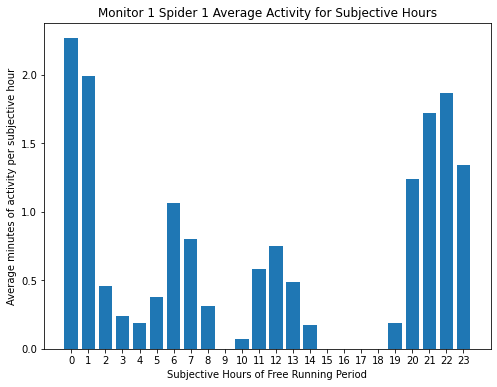

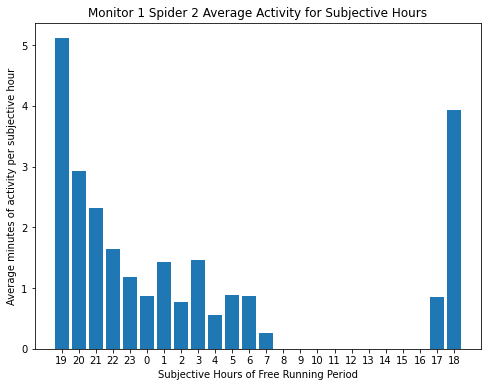

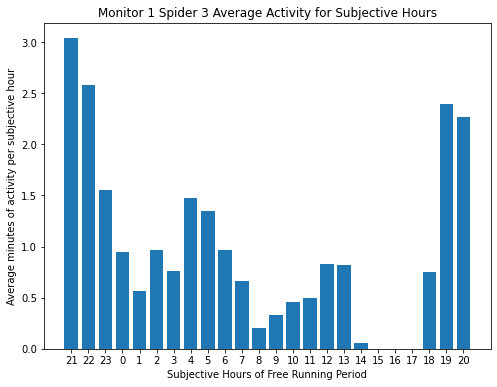

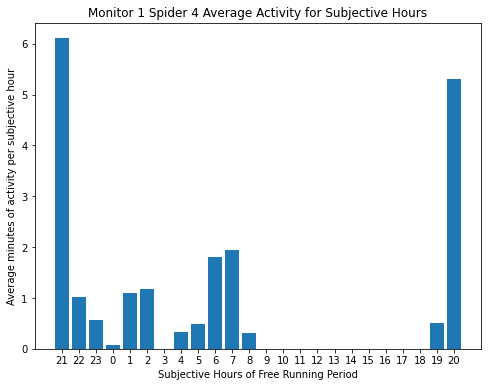

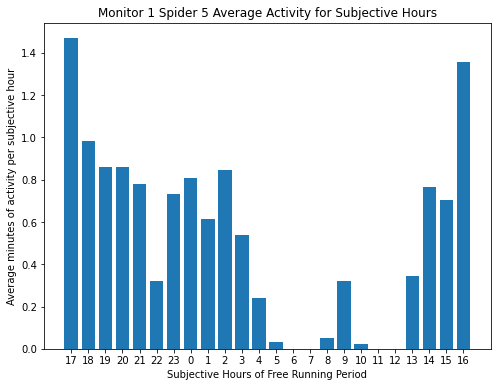

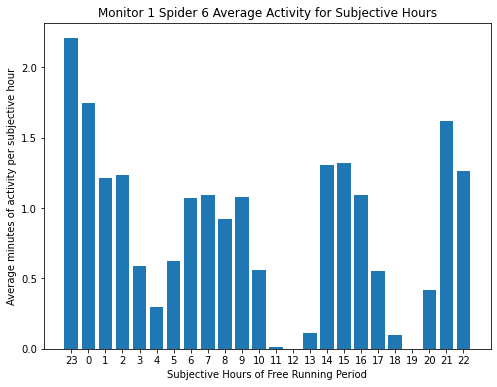

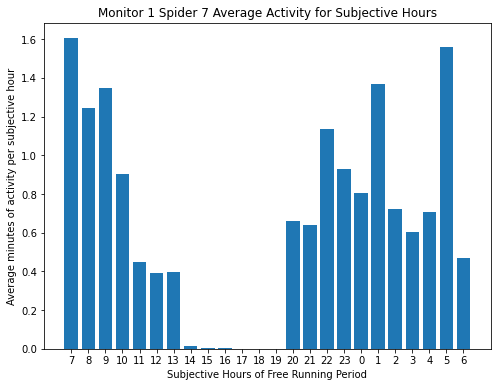

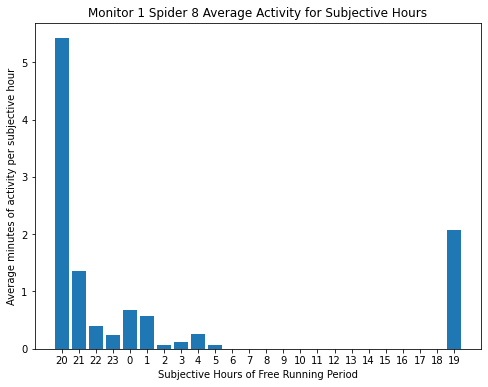

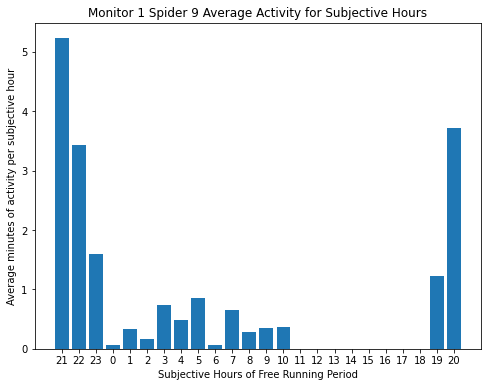

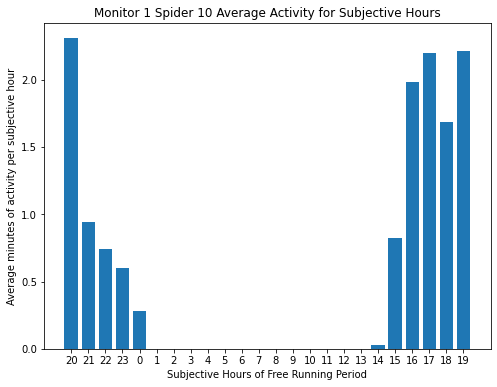

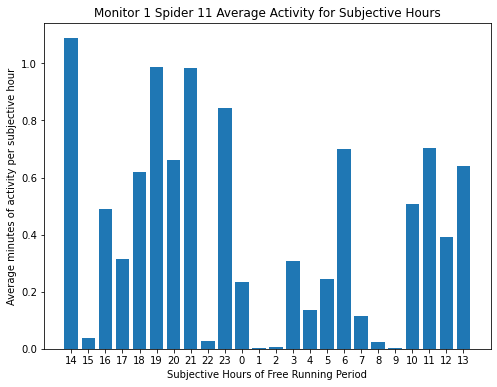

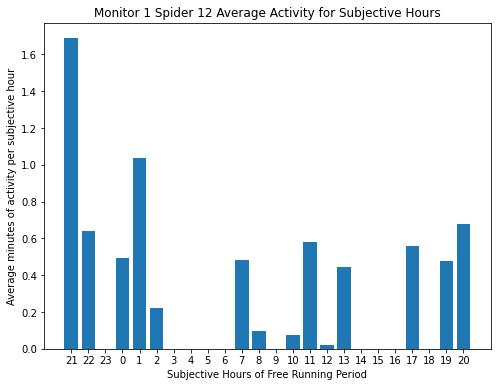

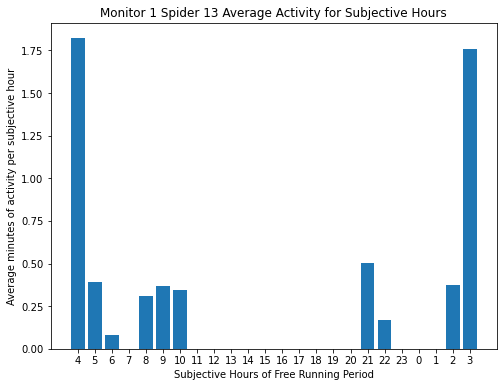

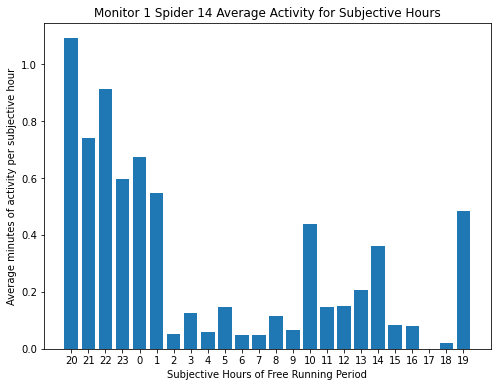

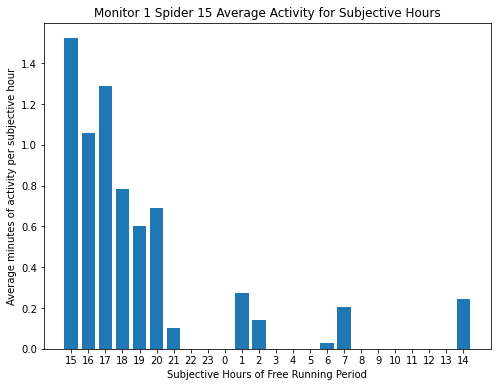

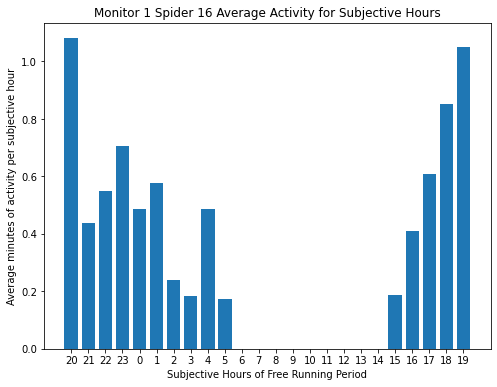

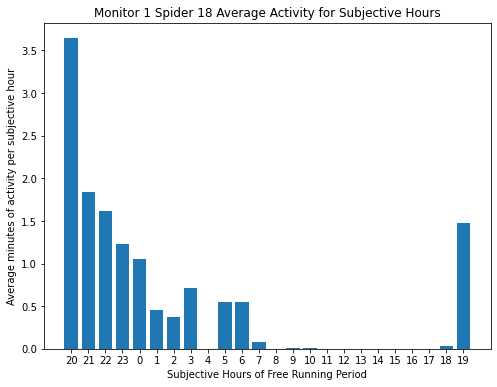

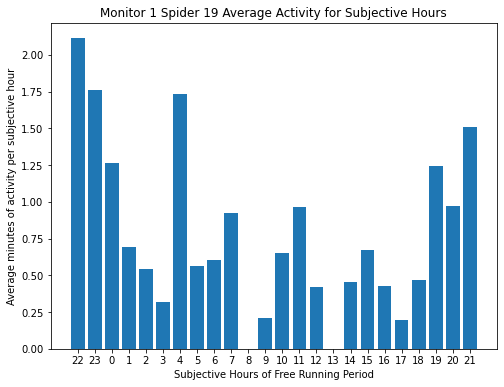

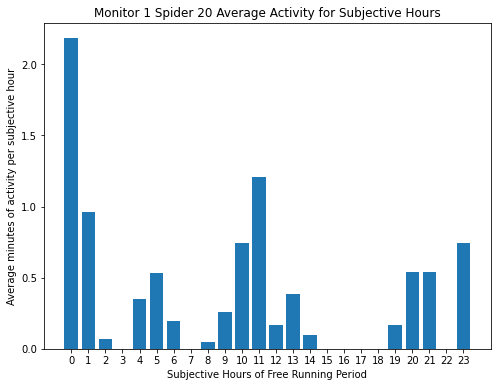

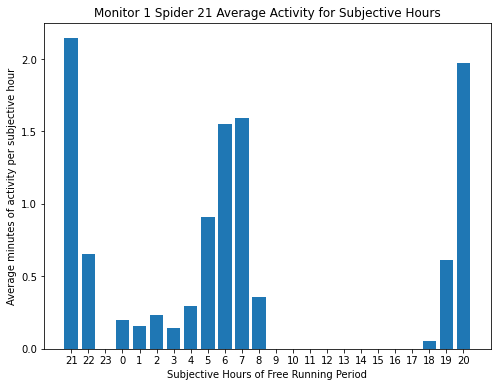

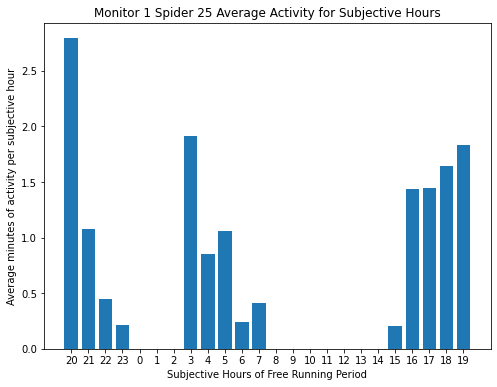

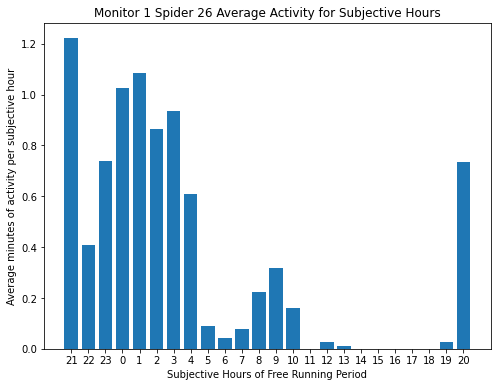

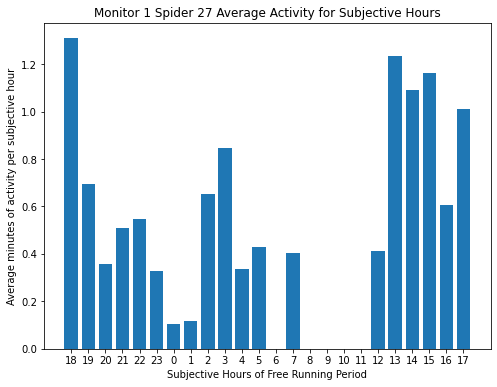

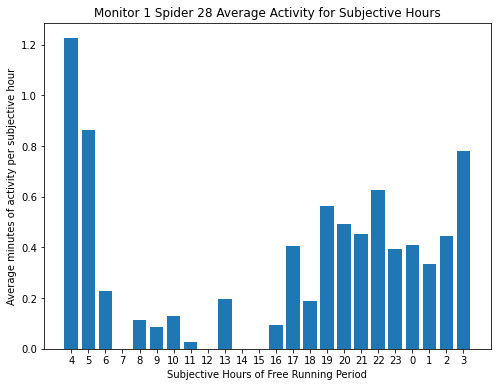

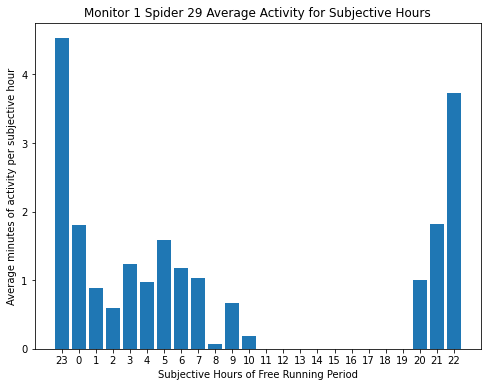

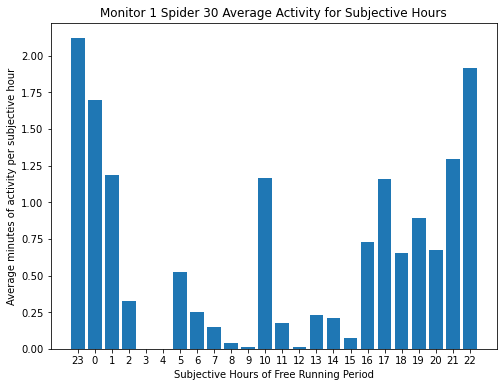

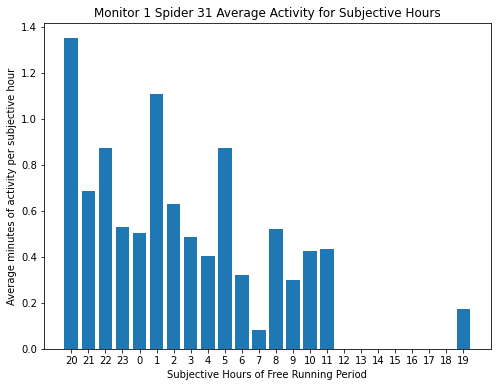

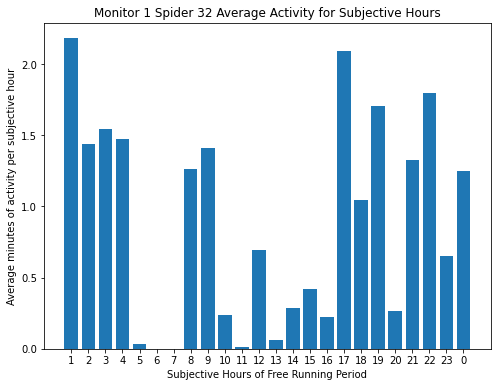

In [46]:
average_subjective_activity_max_first(dfdark, perT)

# Start with No Activity

In [47]:
def average_subjective_activity_min_first(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        min_avg_hour = avg_mins.argmin()
        reordered_avg_mins = pd.concat([avg_mins[min_avg_hour:], avg_mins[:min_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(min_avg_hour, 24)) + list(range(0, min_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

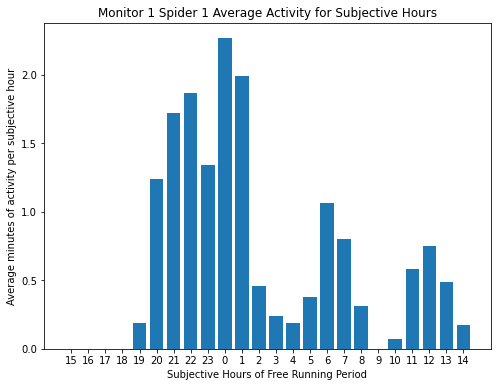

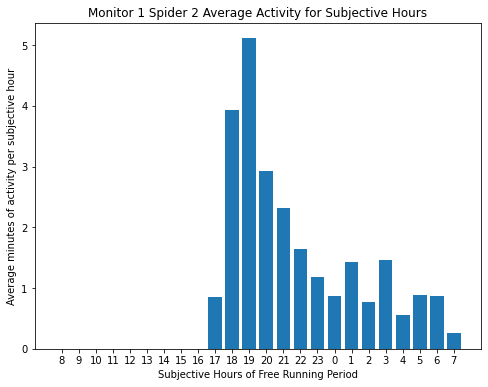

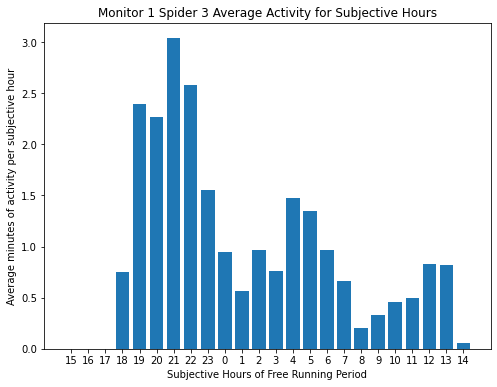

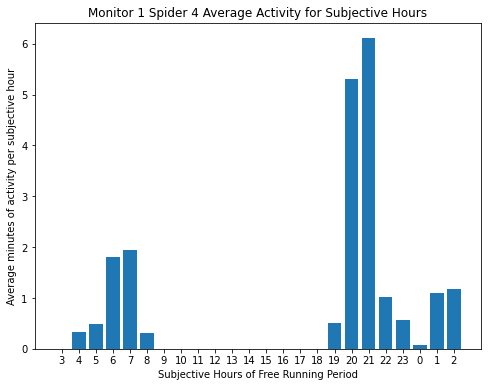

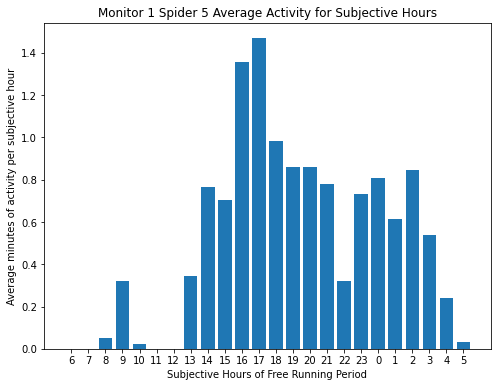

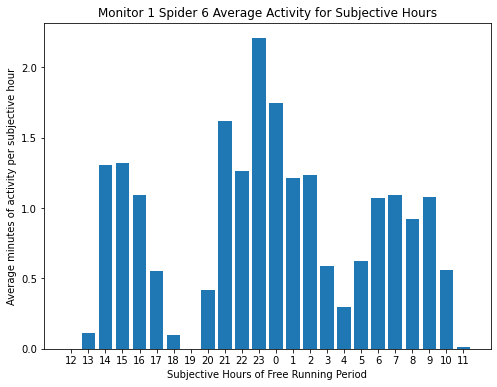

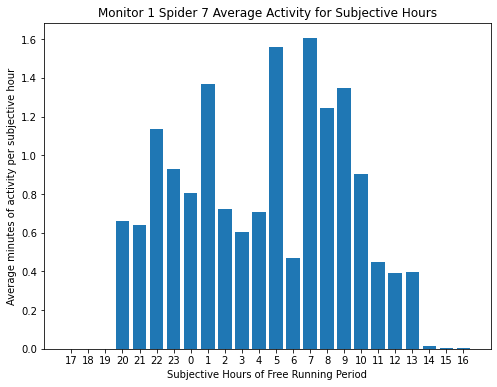

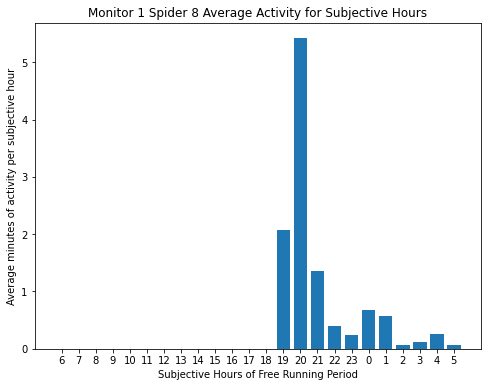

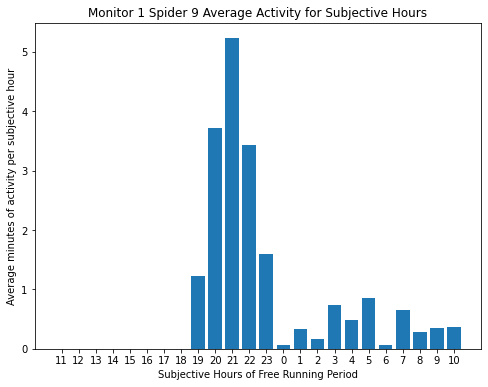

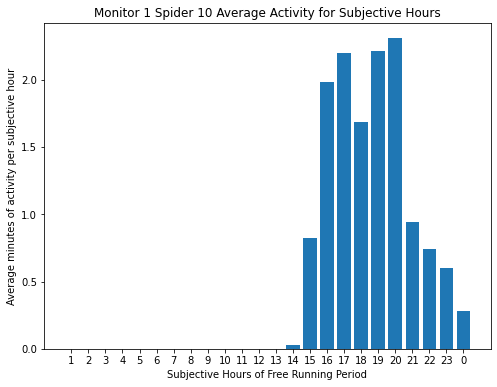

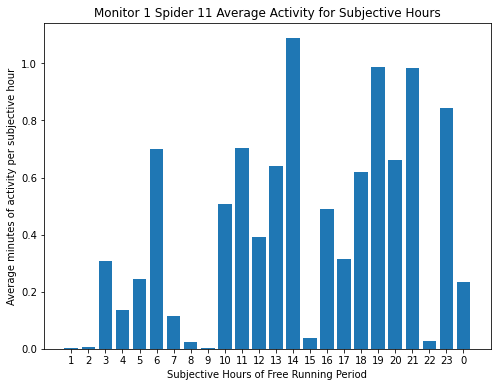

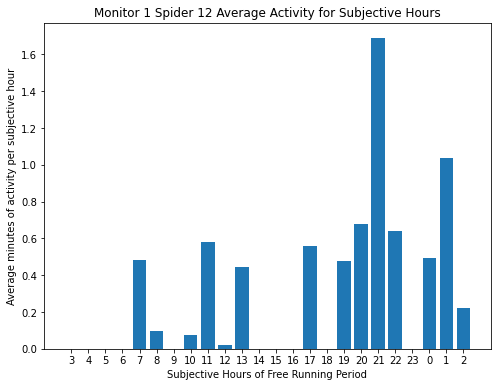

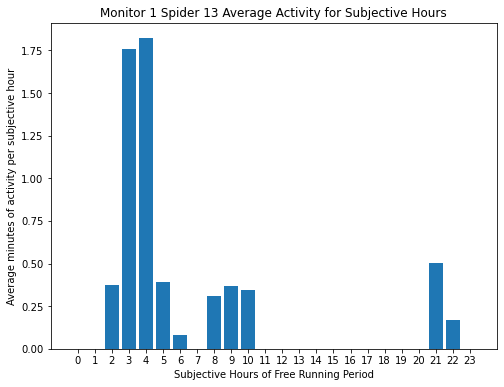

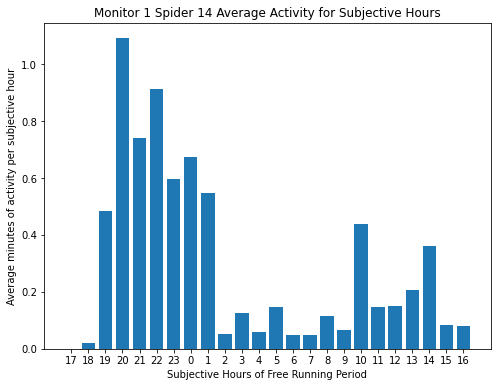

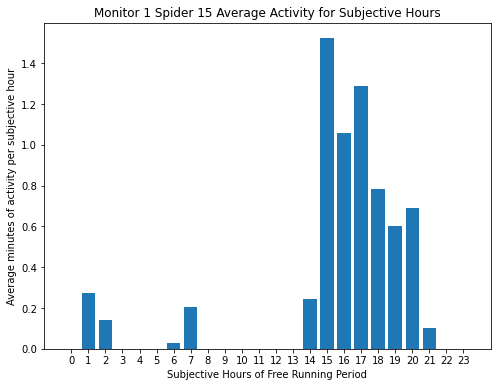

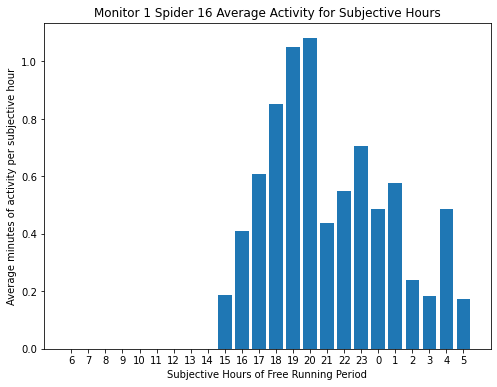

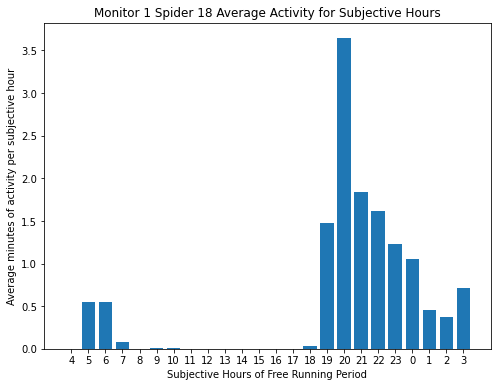

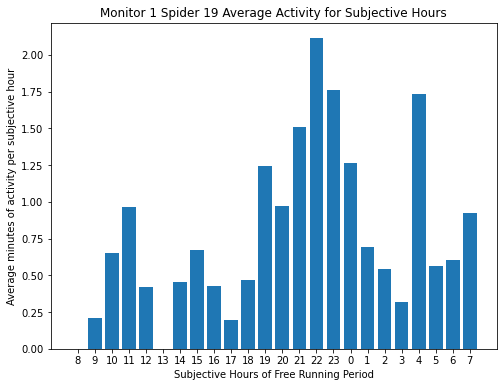

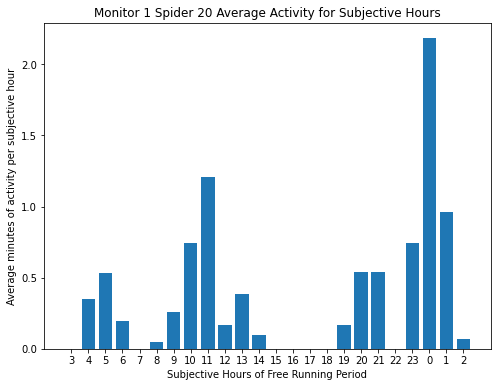

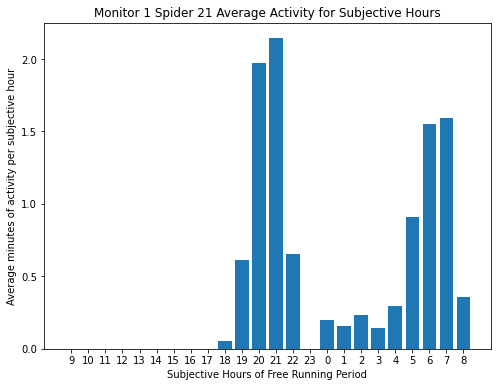

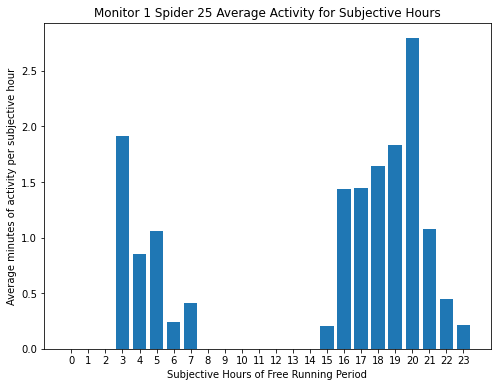

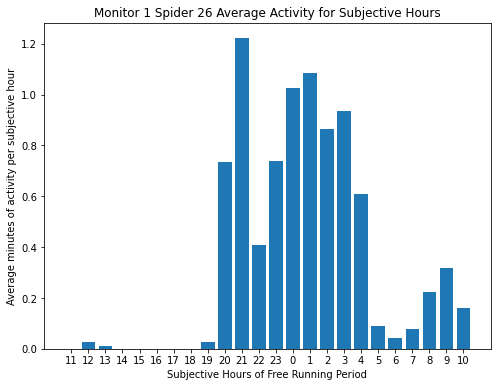

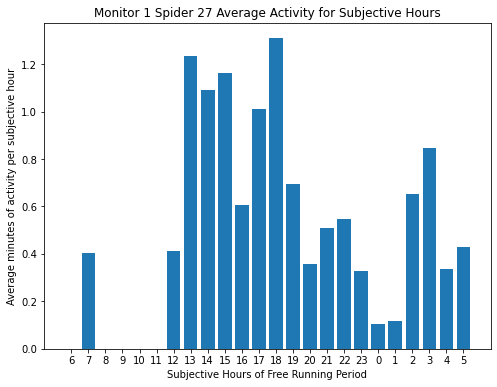

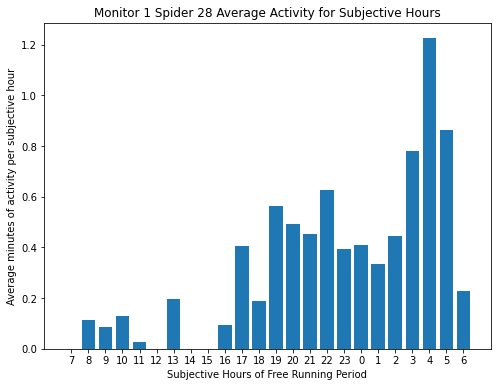

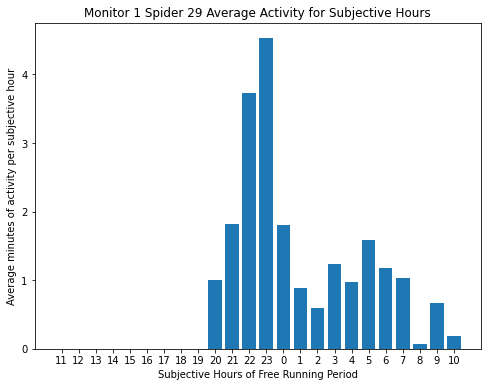

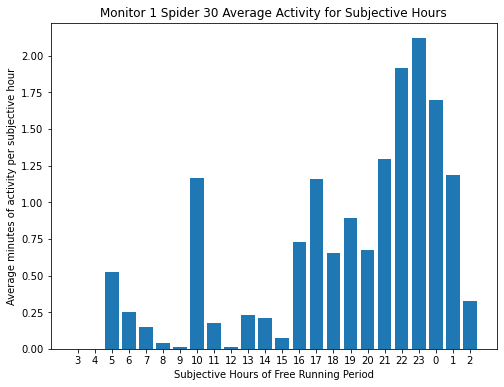

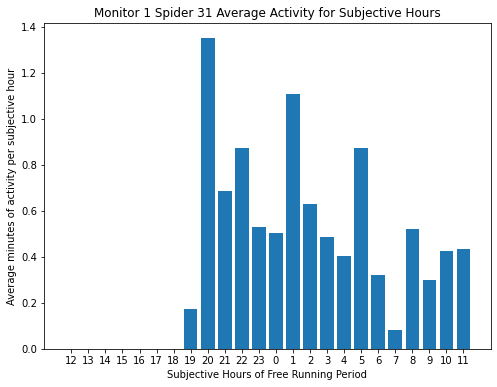

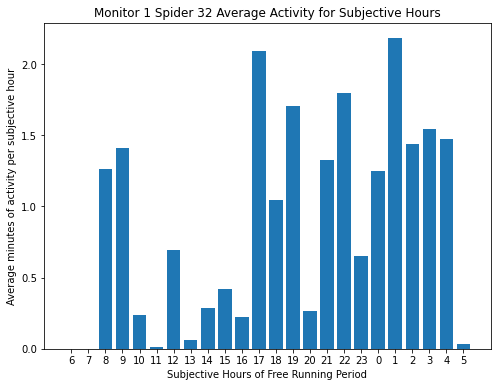

In [48]:
average_subjective_activity_min_first(dfdark, perT)

# 4 Bins

In [49]:
def average_subjective_activity_max_first_4bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 4:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,4), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 4)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

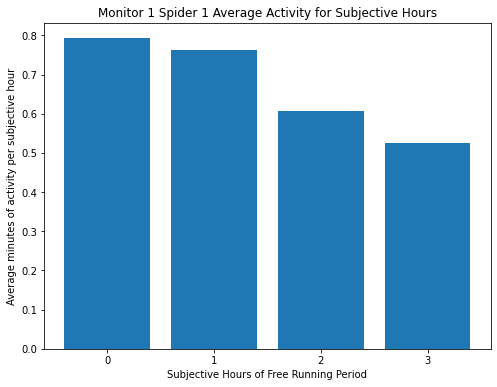

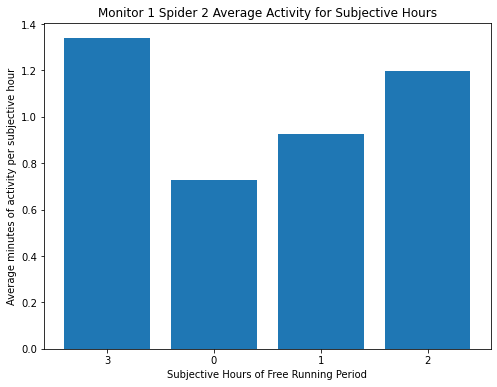

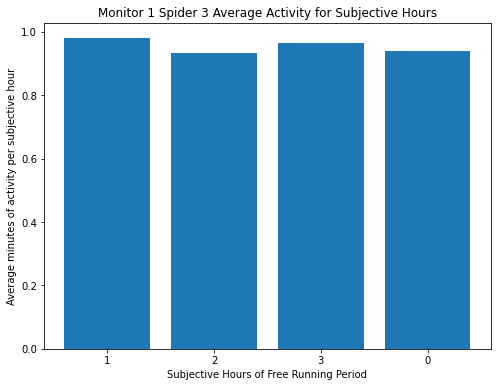

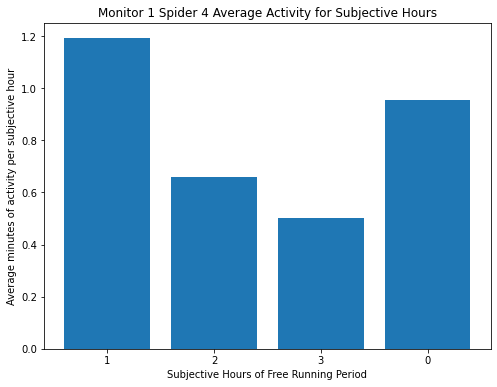

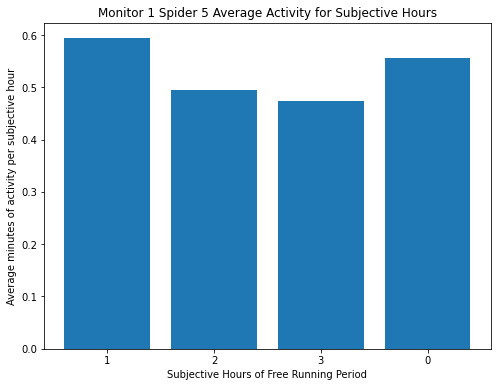

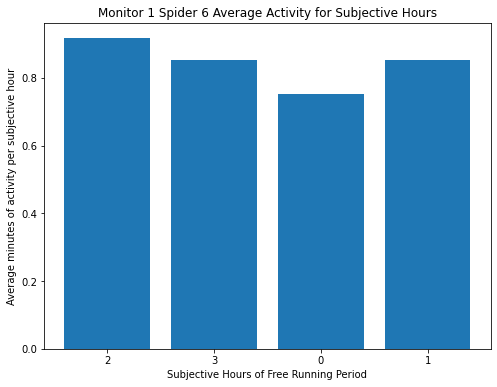

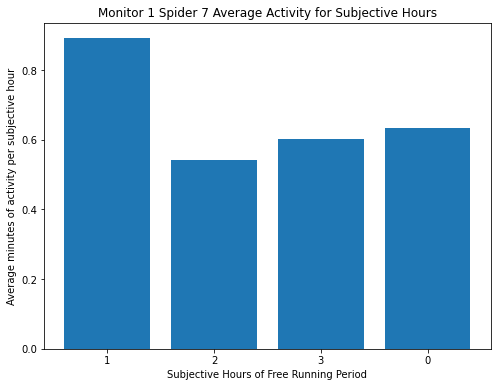

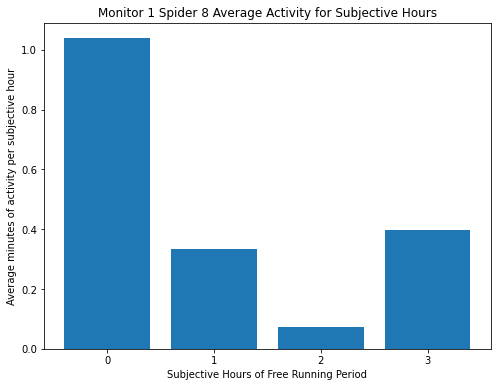

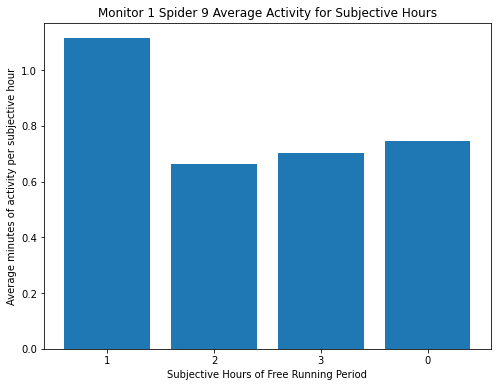

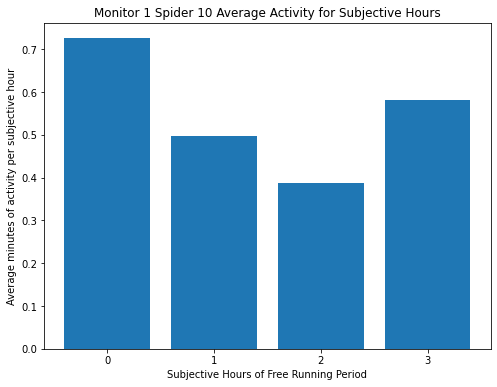

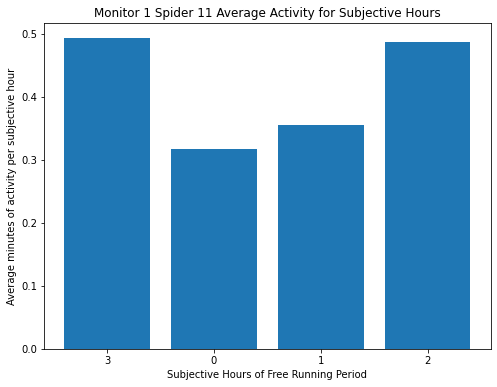

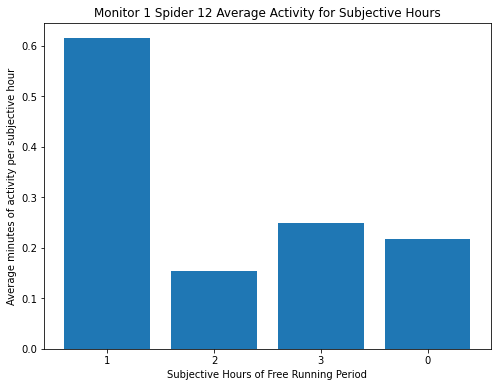

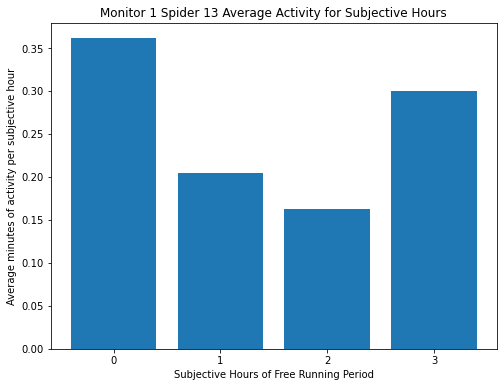

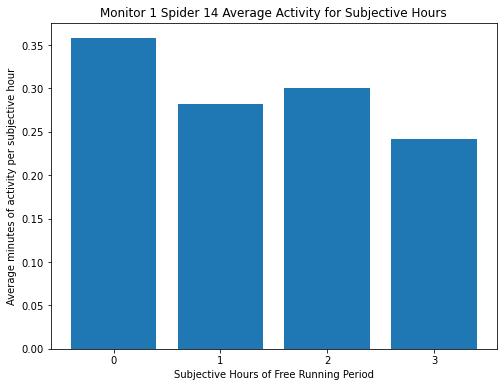

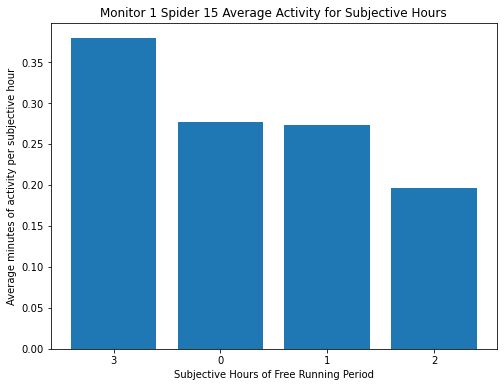

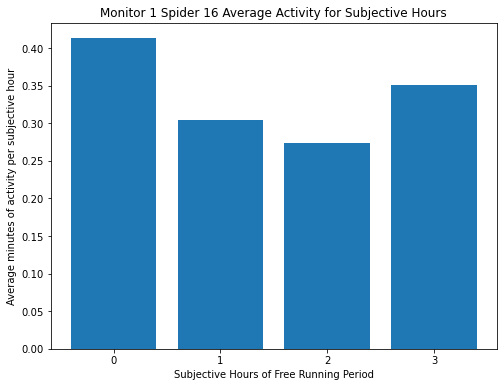

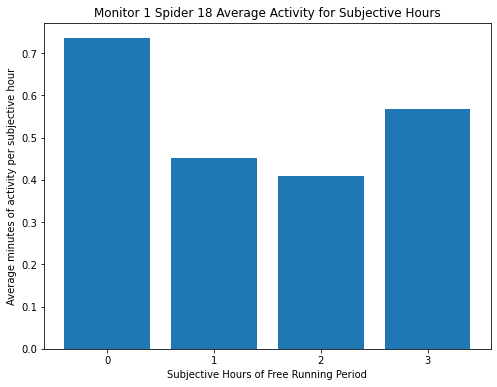

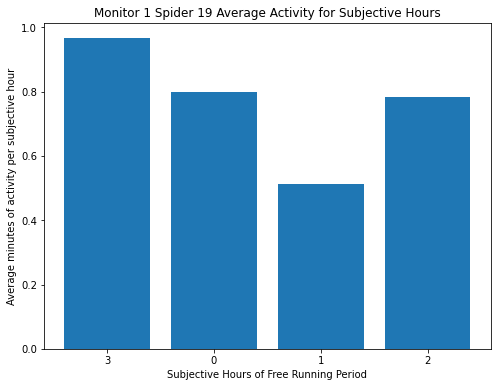

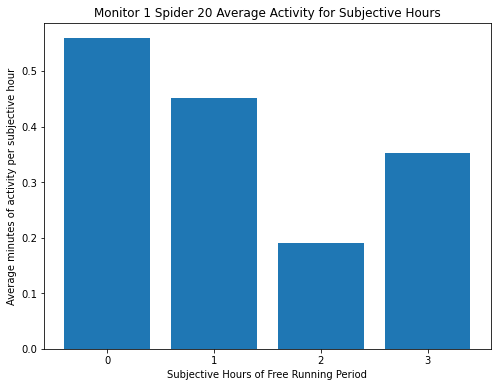

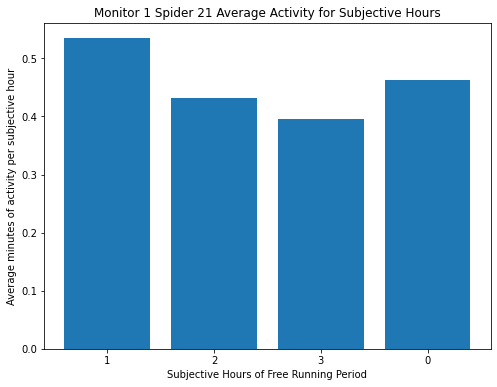

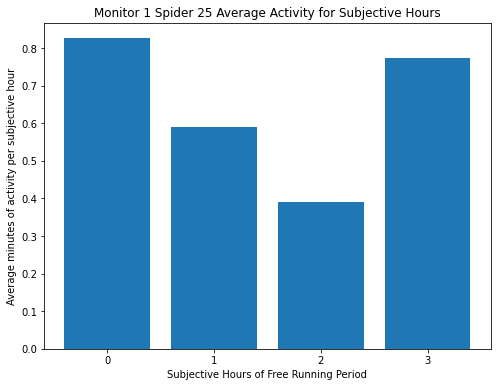

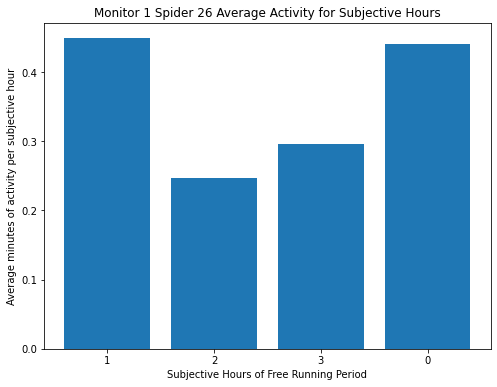

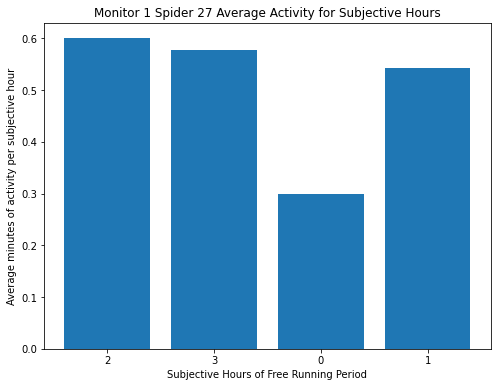

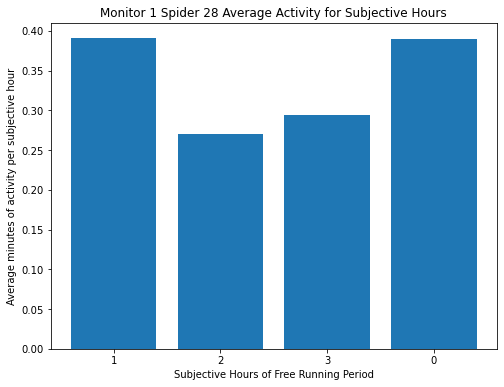

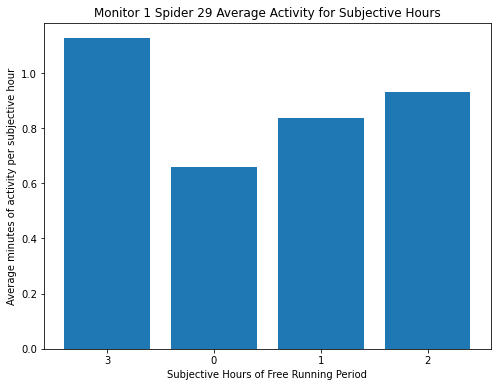

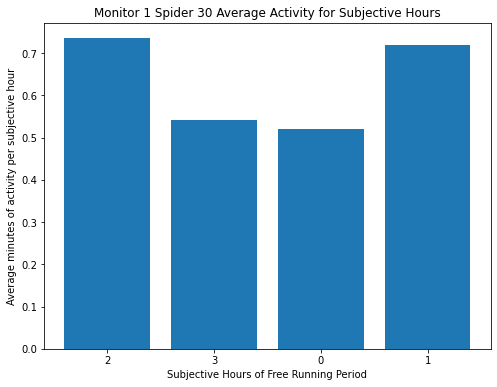

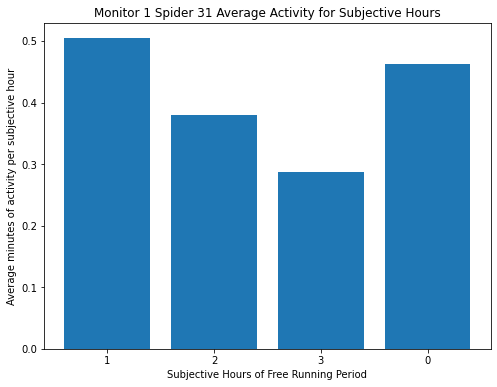

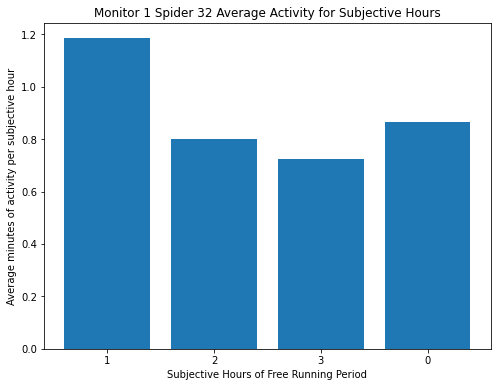

In [50]:
average_subjective_activity_max_first_4bins(dfdark, perT)

# 8 Bins

In [51]:
def average_subjective_activity_max_first_8bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 8:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,8), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 8)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

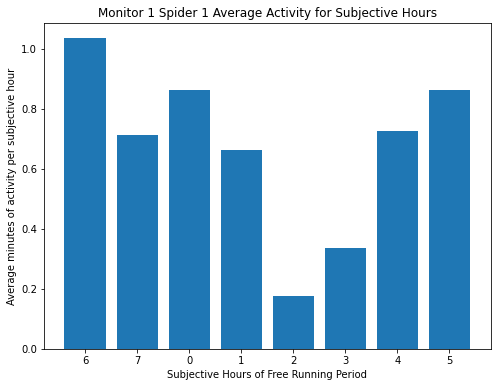

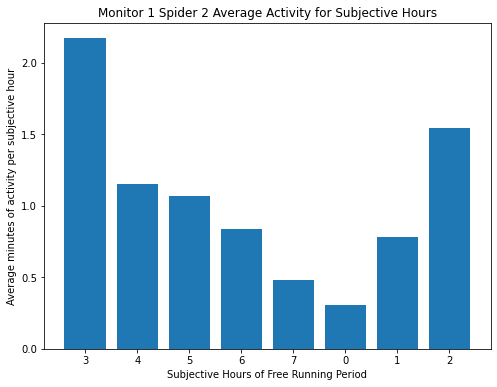

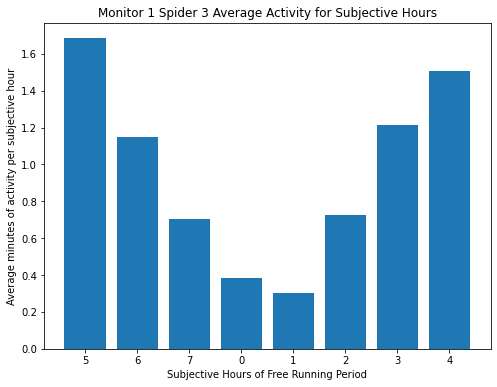

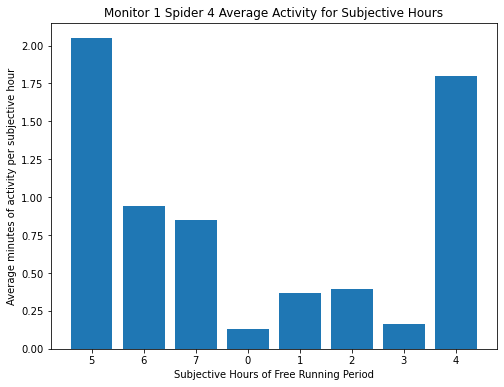

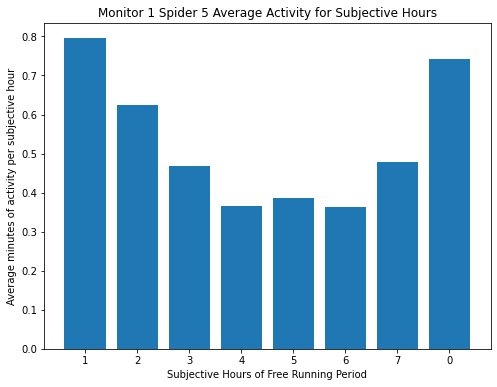

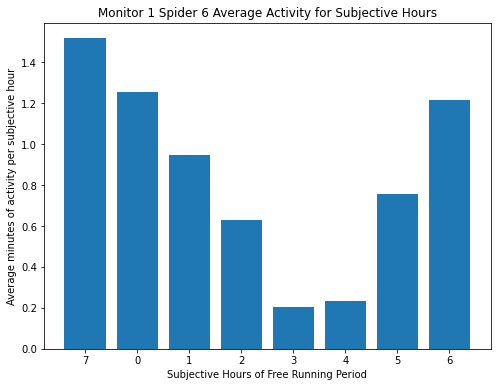

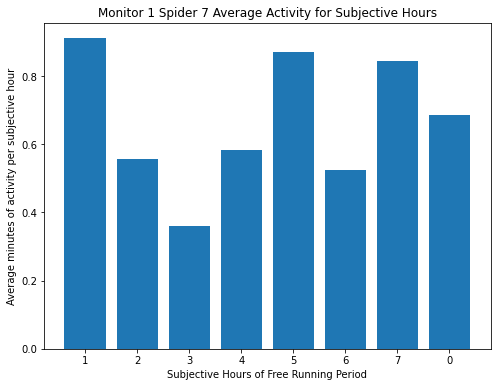

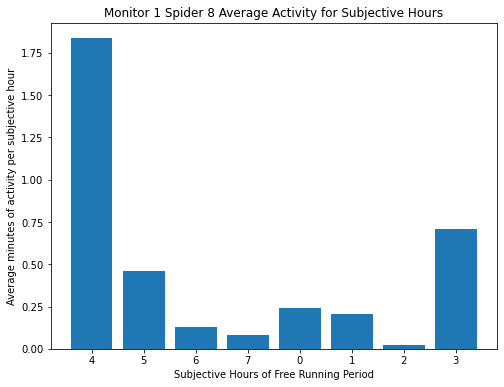

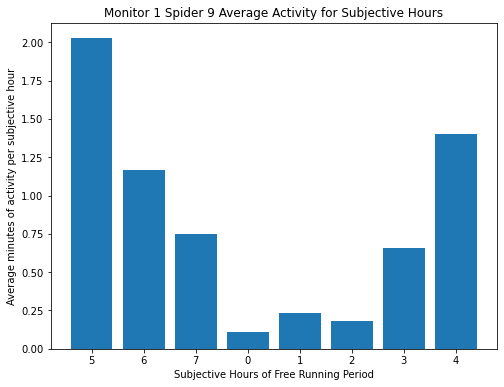

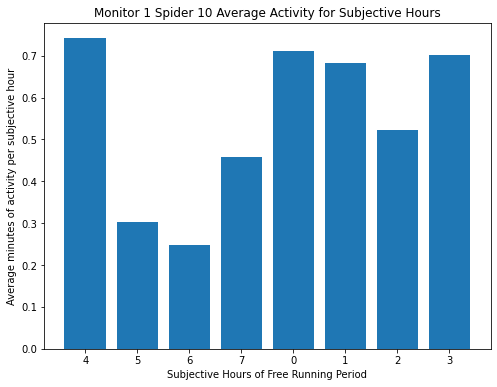

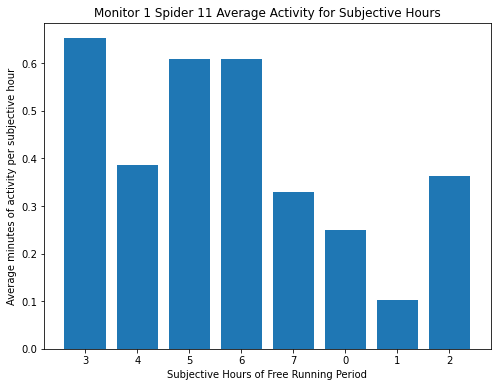

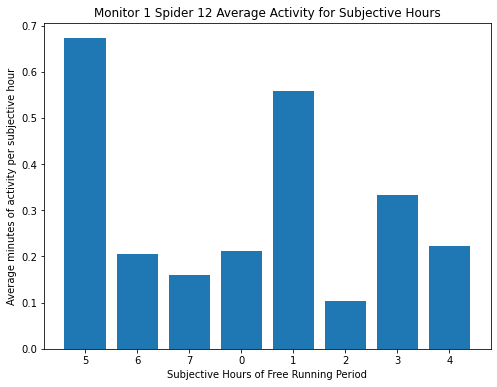

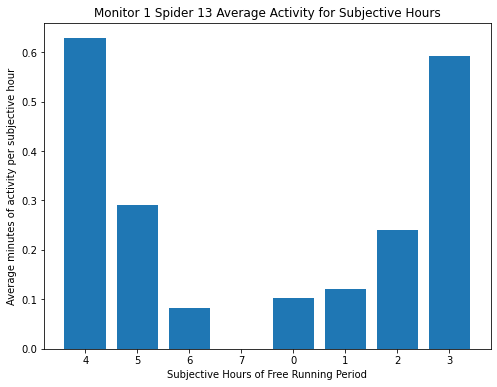

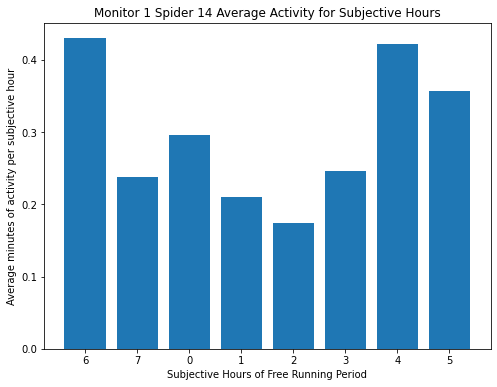

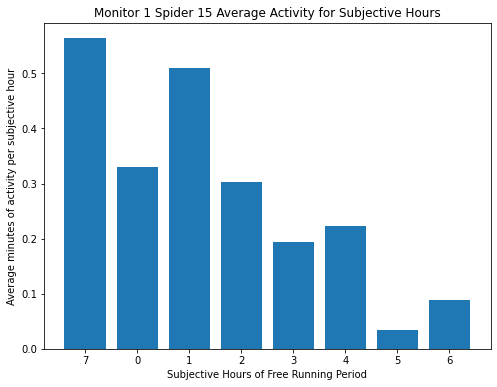

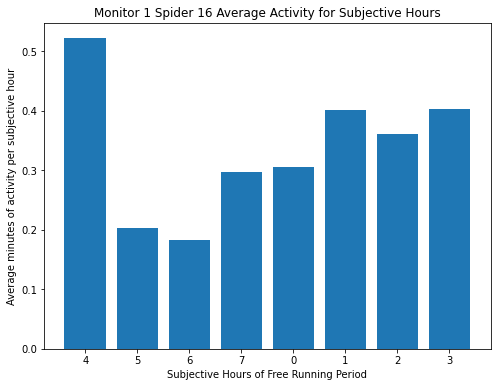

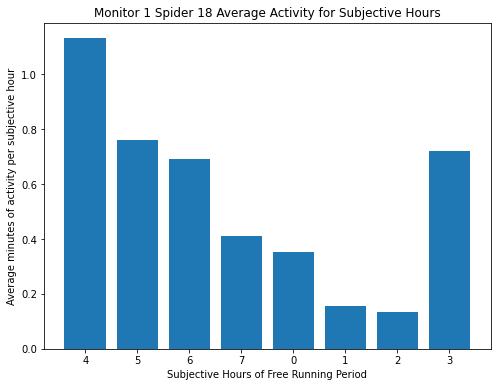

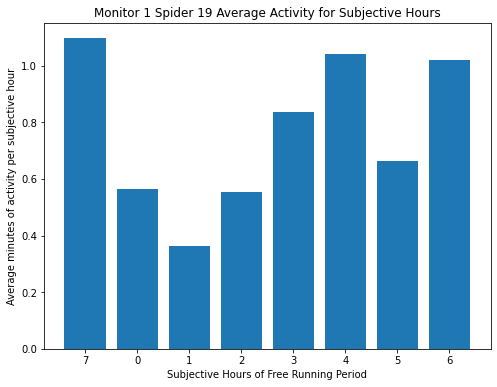

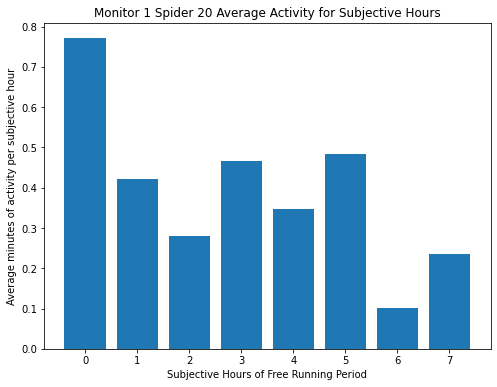

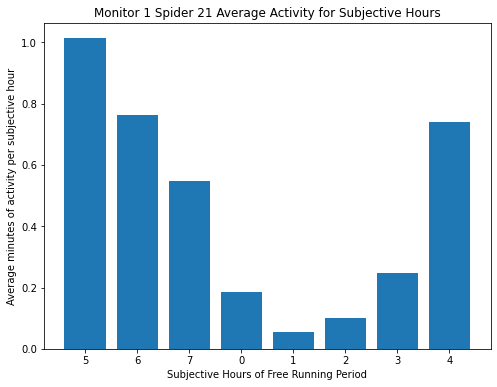

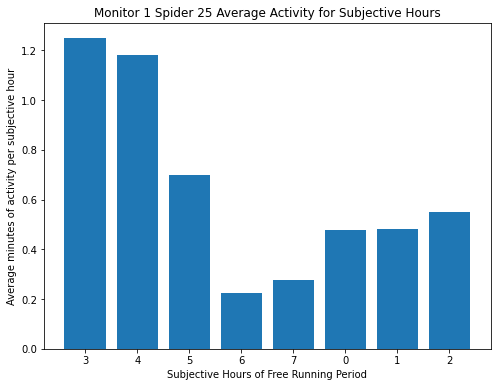

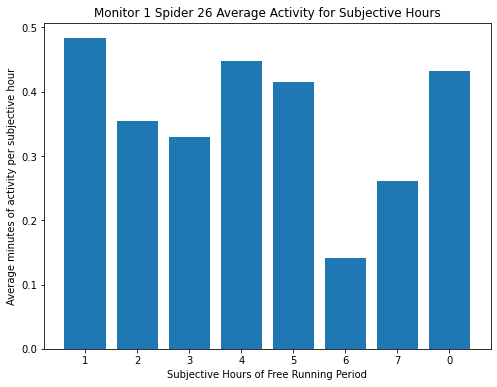

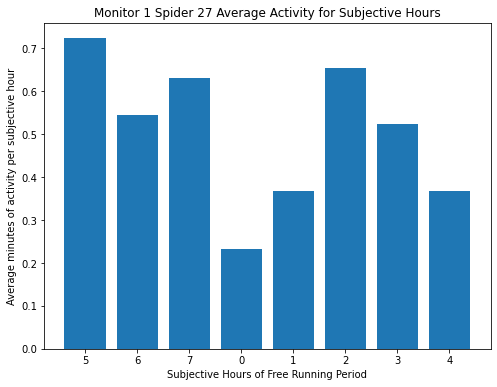

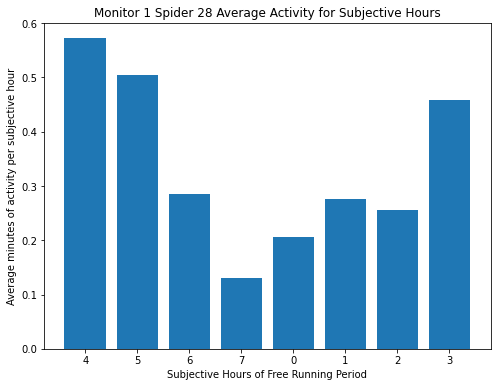

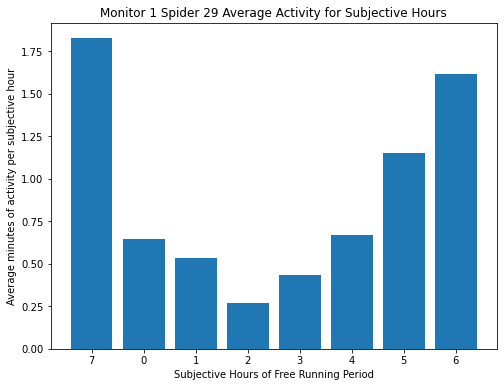

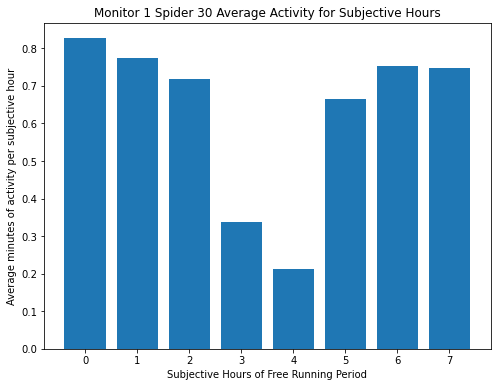

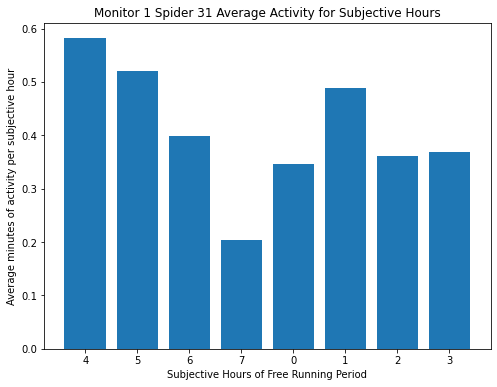

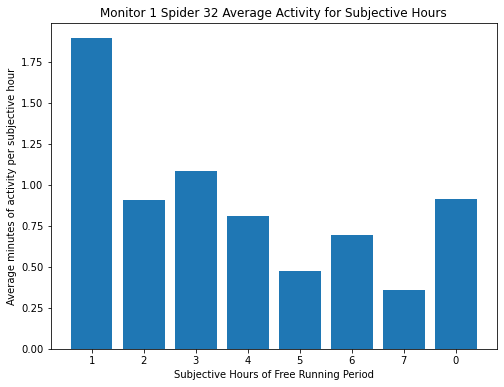

In [52]:
average_subjective_activity_max_first_8bins(dfdark, perT)

# 12 Bins

In [53]:
def average_subjective_activity_max_first_12bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 12:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,12), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 12)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

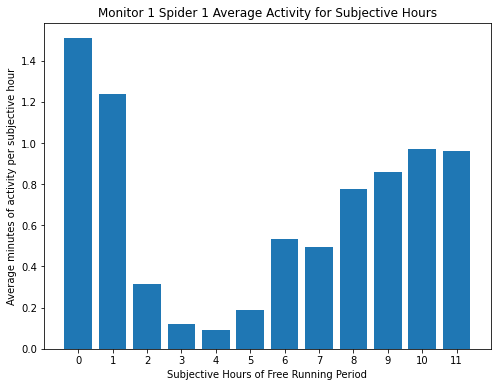

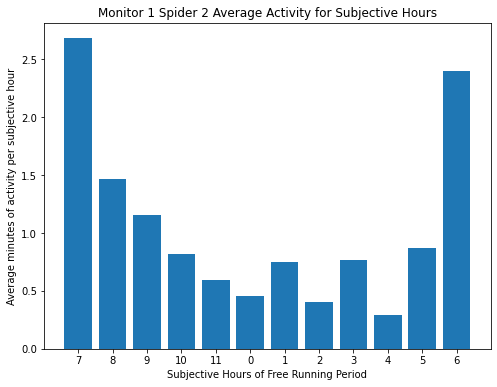

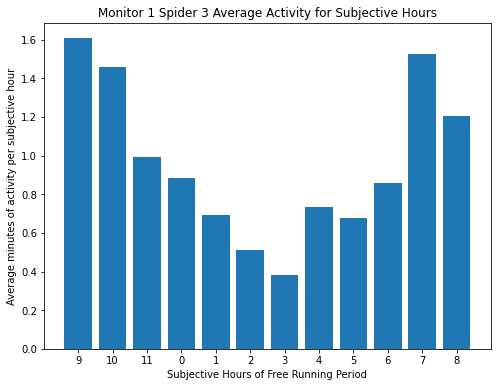

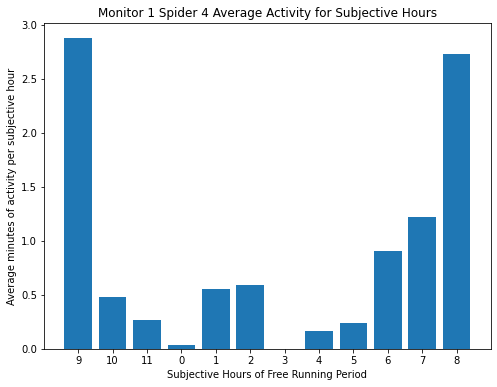

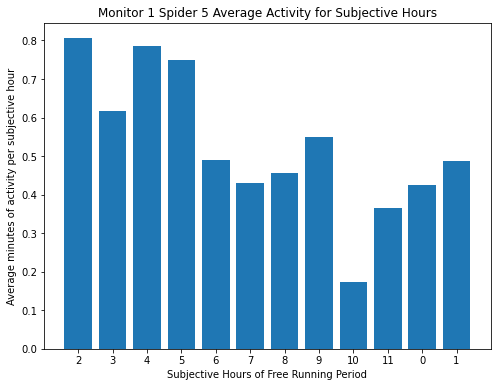

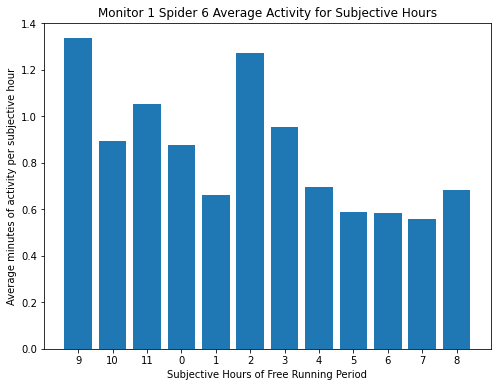

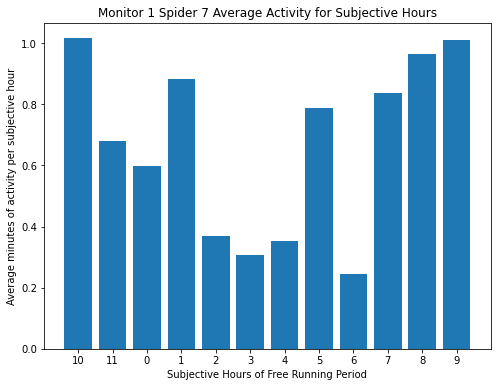

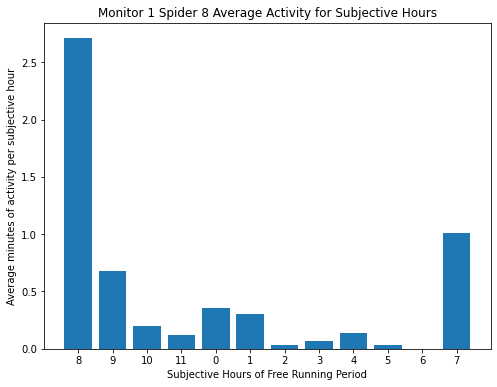

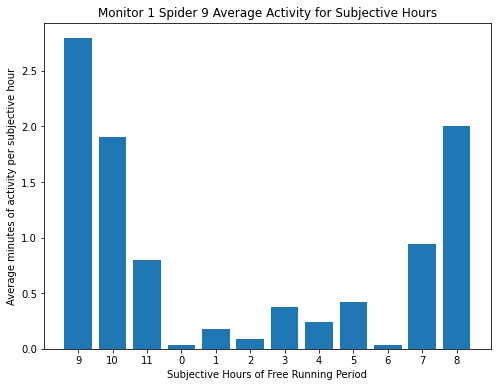

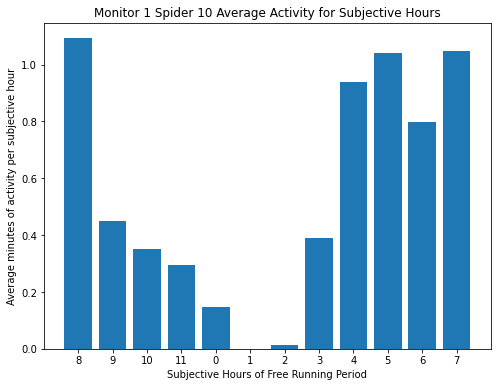

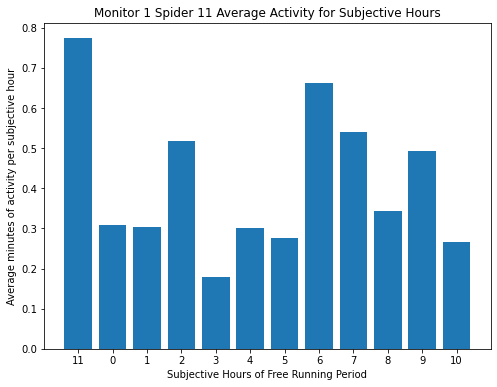

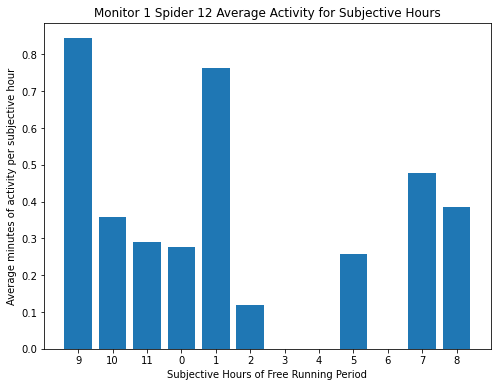

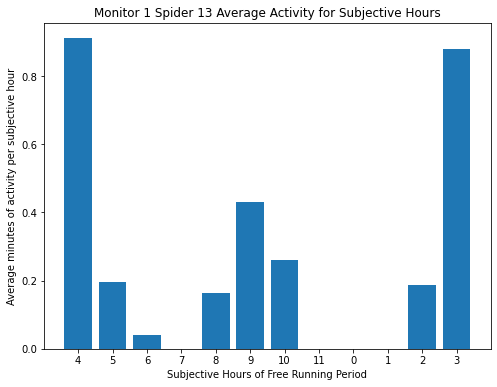

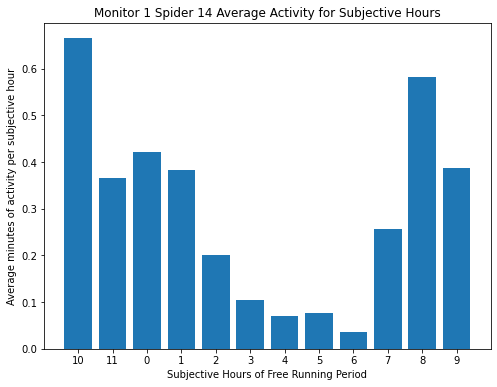

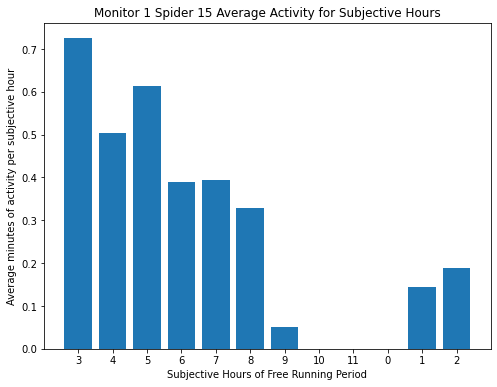

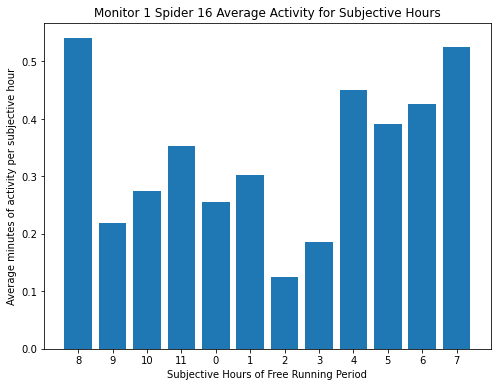

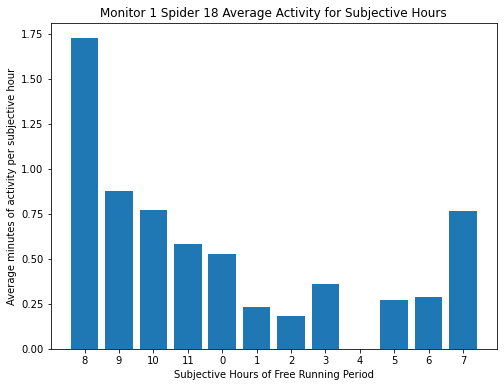

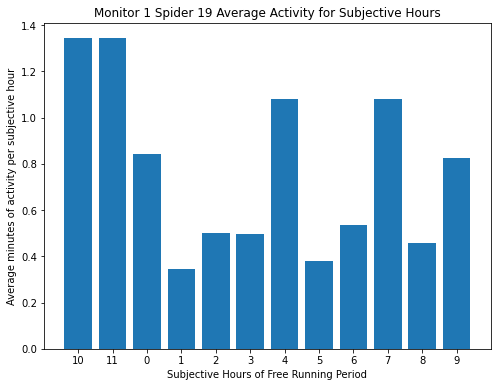

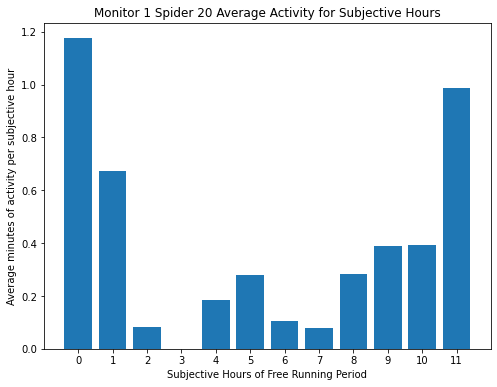

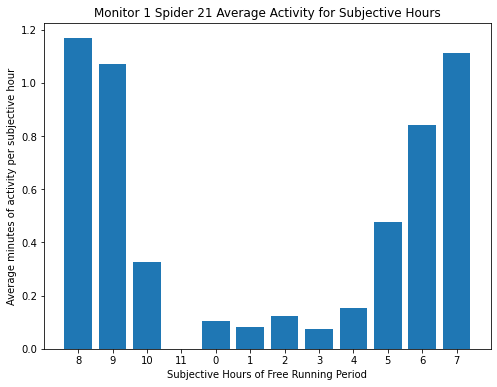

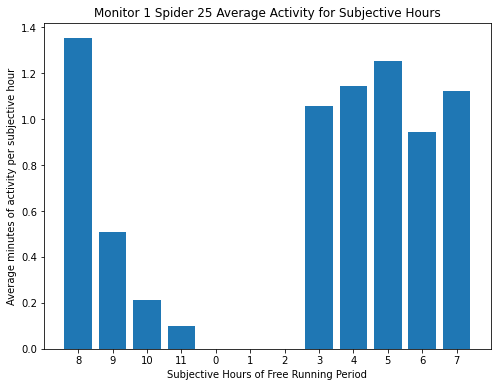

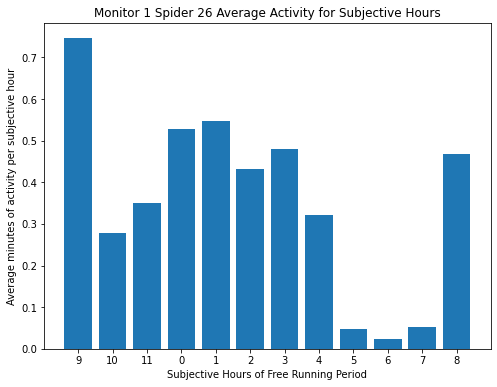

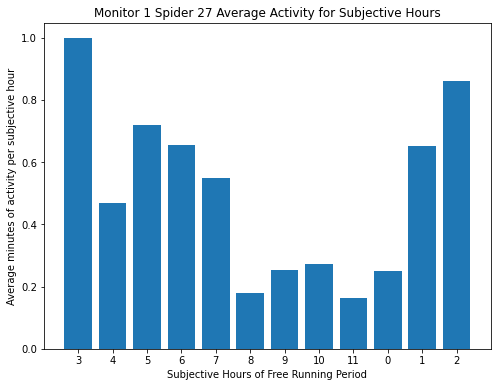

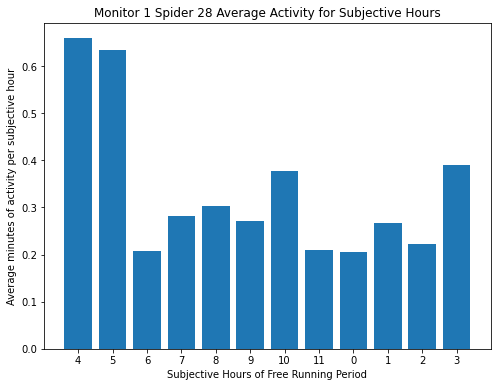

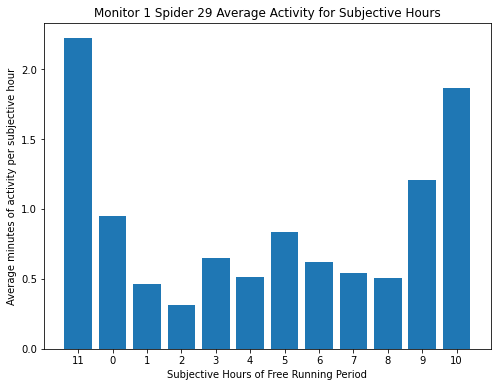

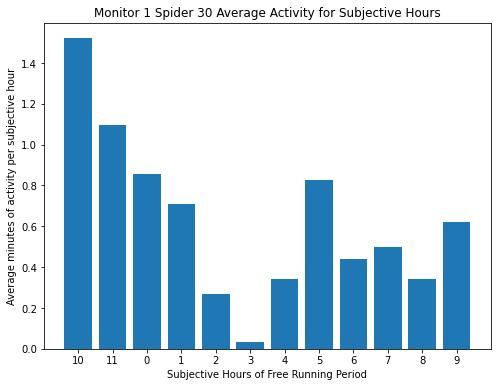

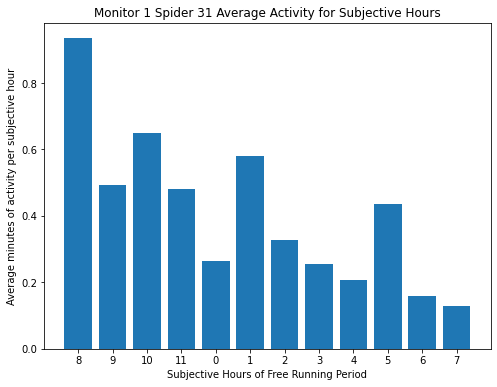

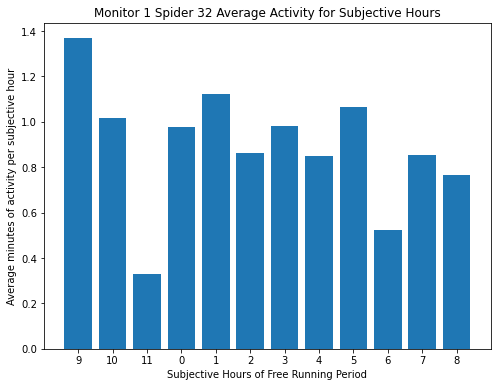

In [54]:
average_subjective_activity_max_first_12bins(dfdark, perT)

# 36 Bins

In [55]:
def average_subjective_activity_max_first_36bins(df, subjective_df):
    dft = df.copy()
    for spider in range(len(dft.columns)):
        spider_period = subjective_df[columns[spider]].values
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 and i >= 40:
                hour += 1
            if hour == 36:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,36), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 36)) + list(range(0, max_avg_hour))
        #print(tick_labels)
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

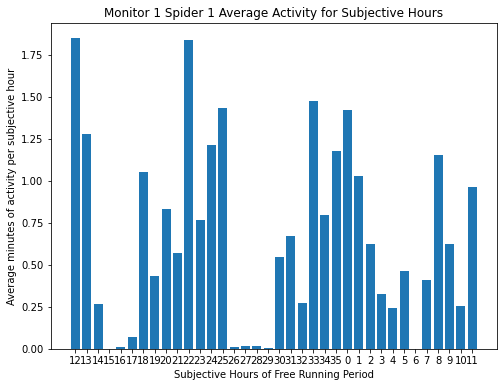

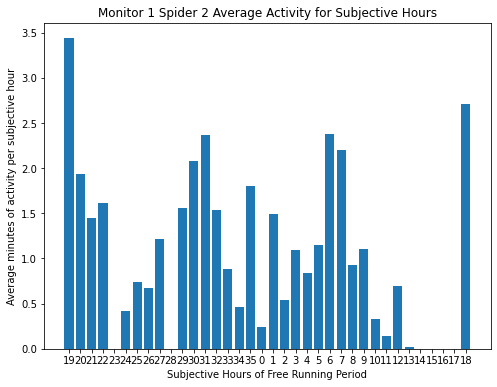

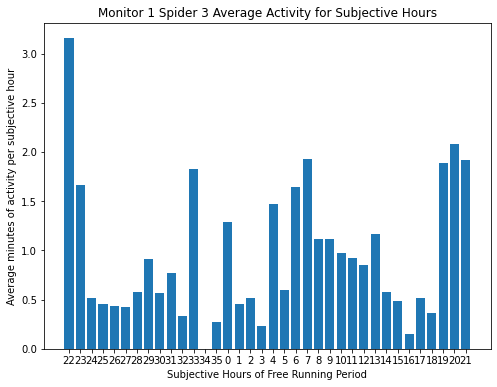

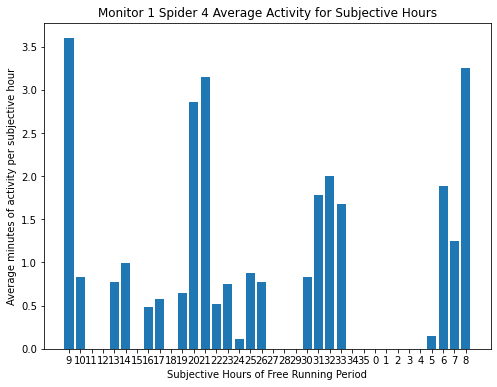

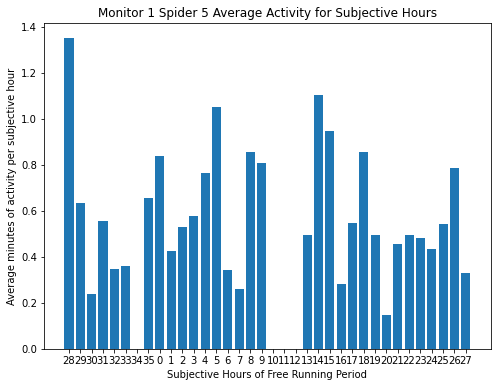

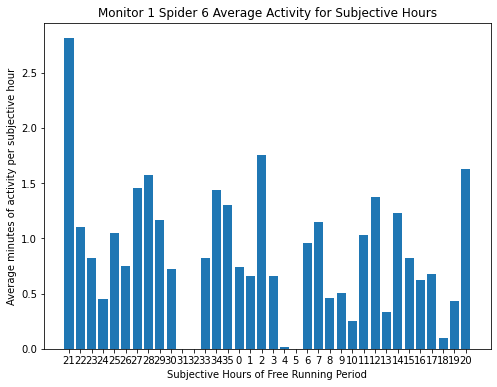

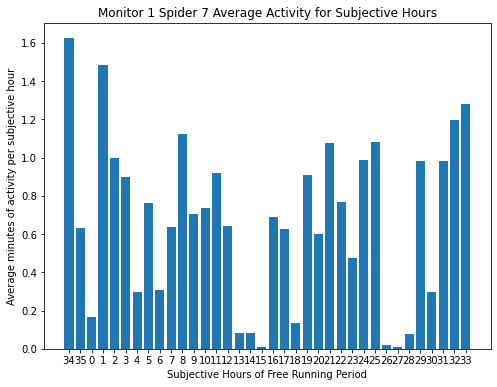

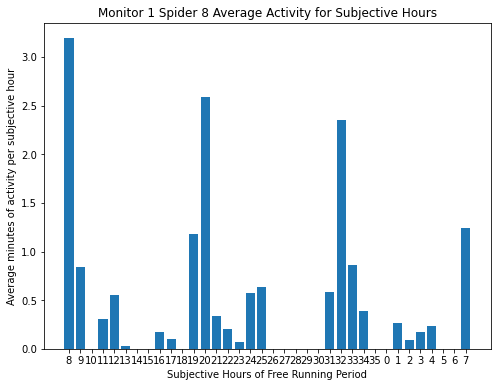

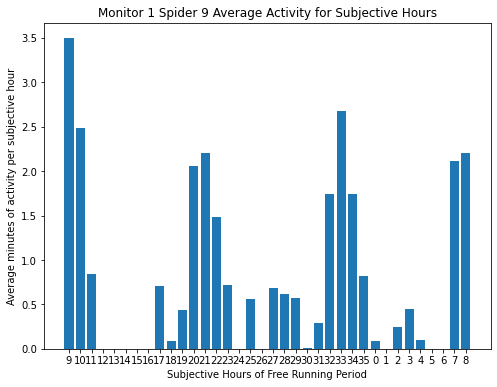

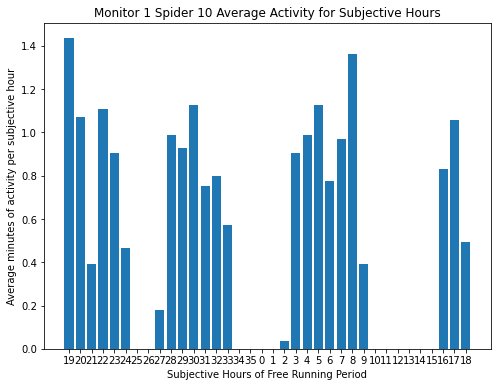

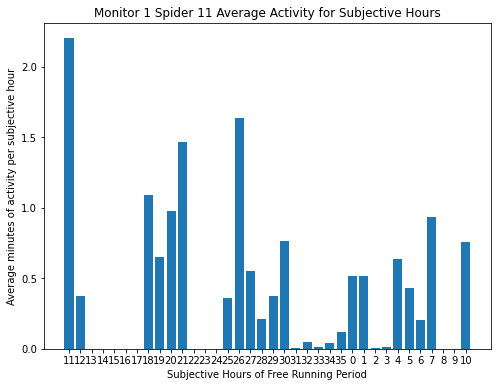

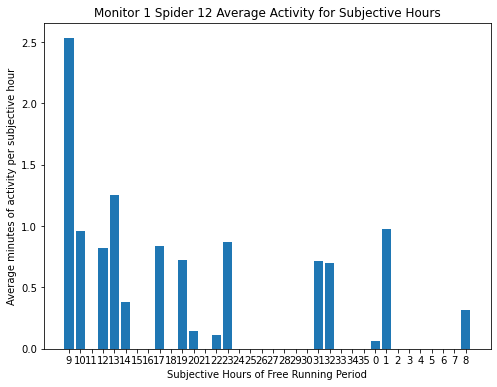

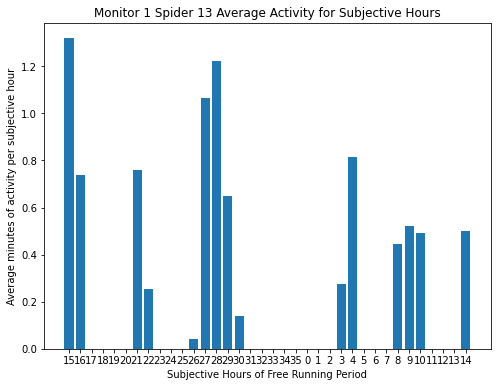

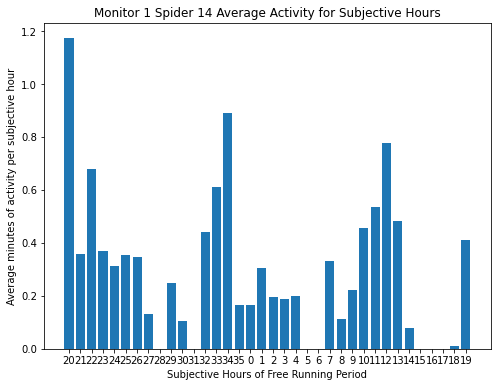

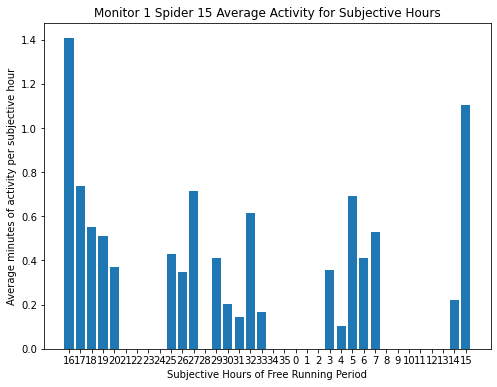

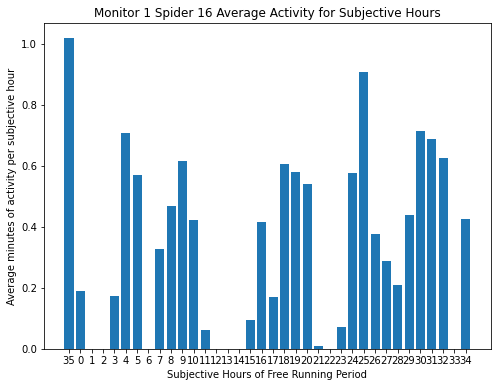

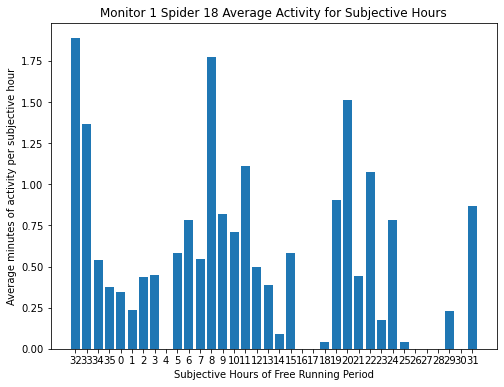

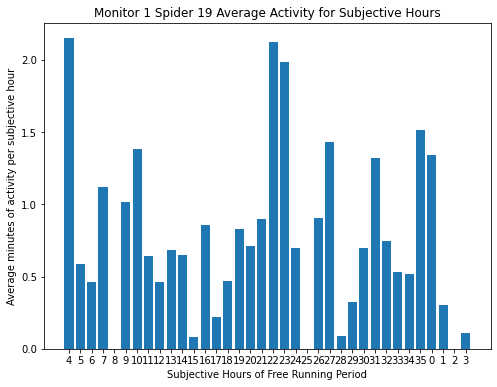

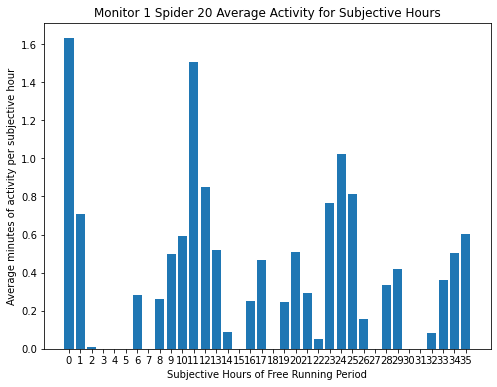

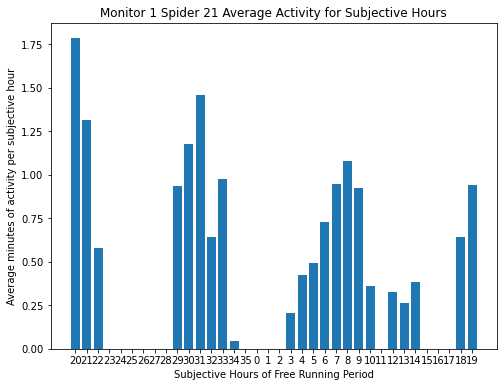

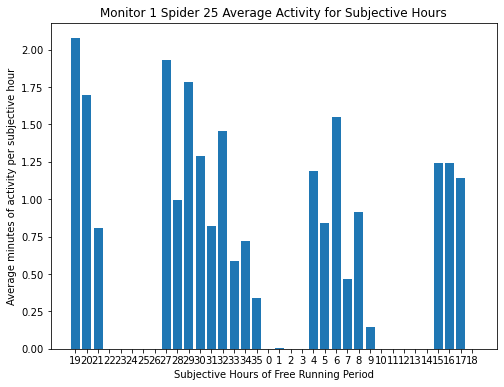

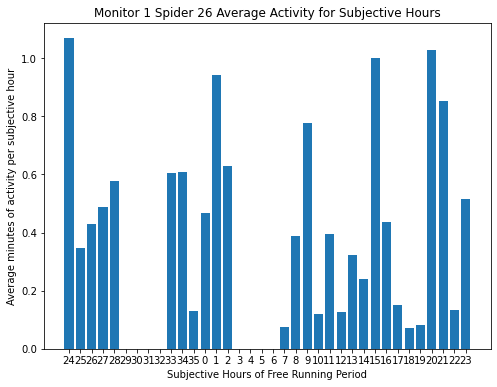

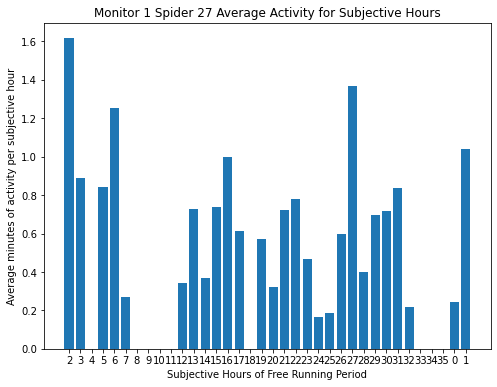

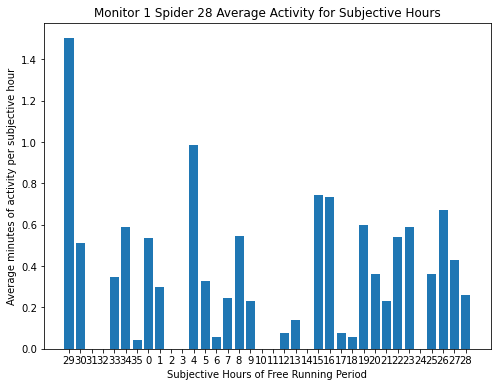

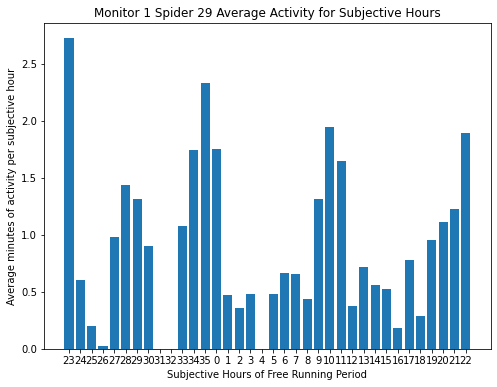

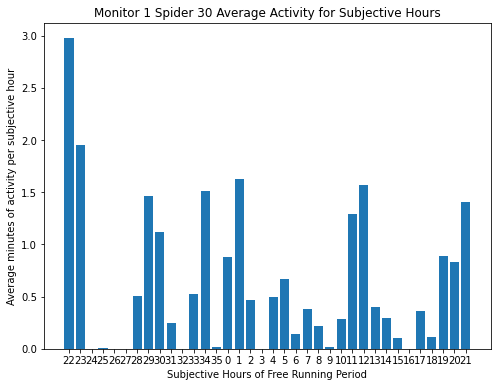

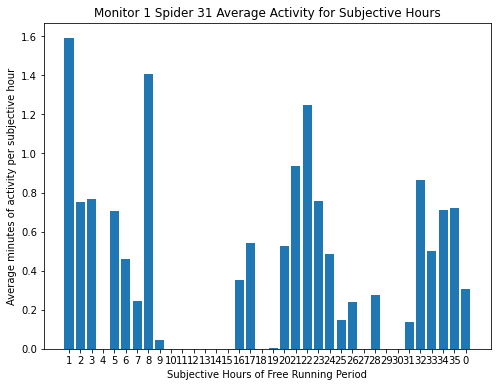

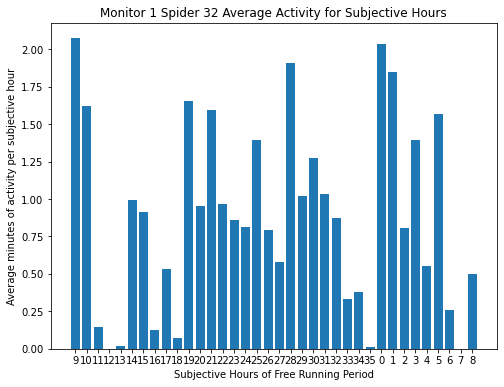

In [56]:
average_subjective_activity_max_first_36bins(dfdark, perT)

# LD Plots

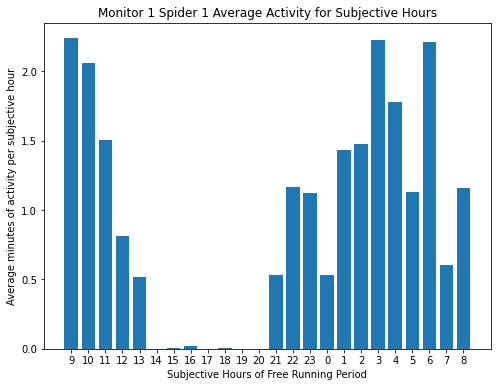

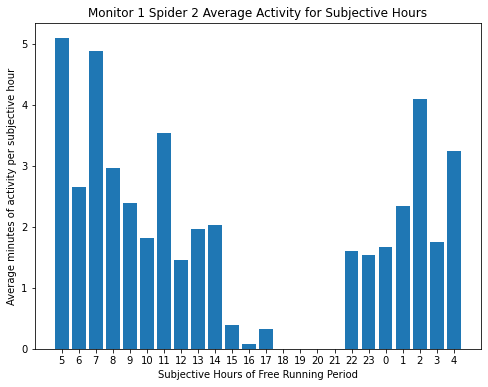

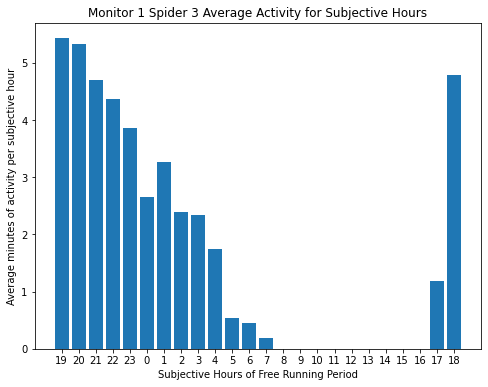

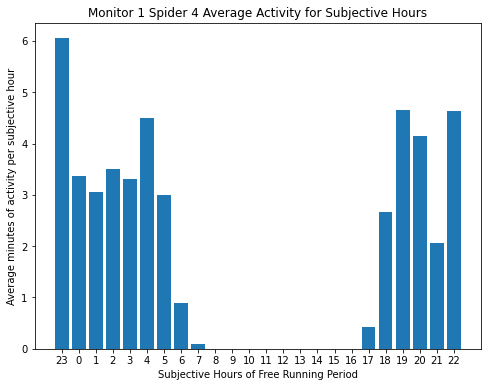

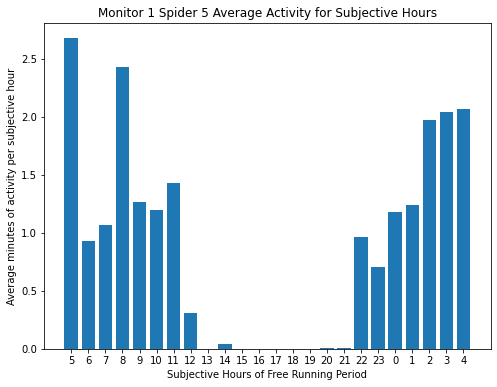

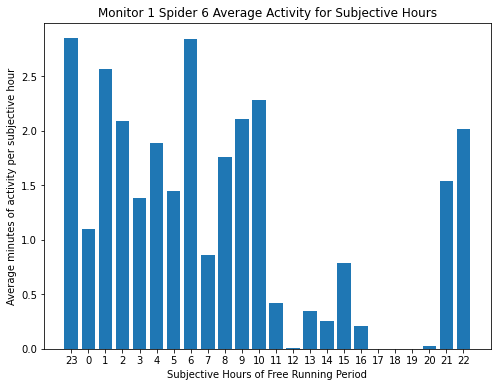

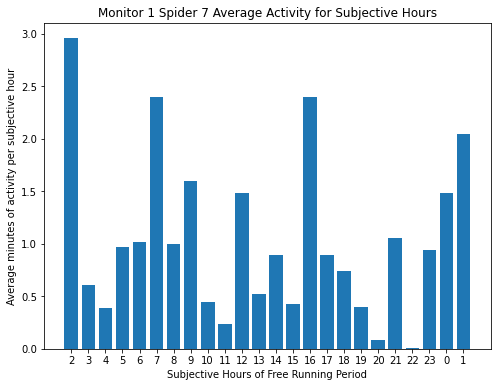

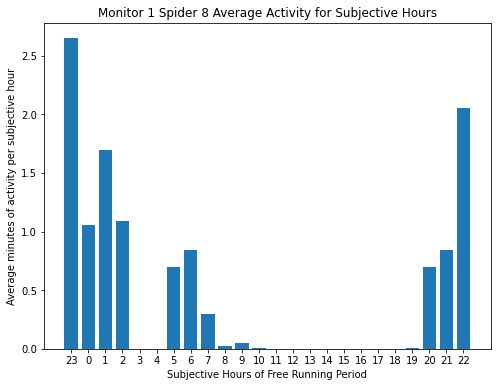

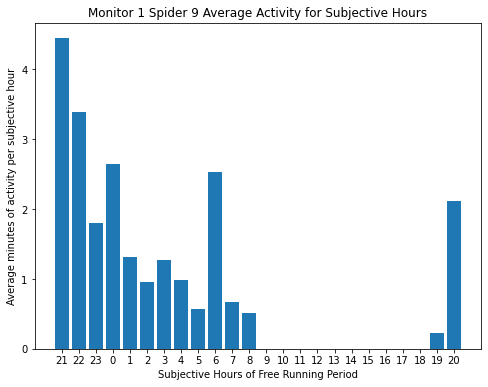

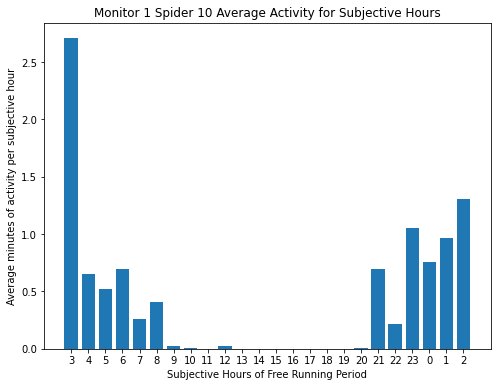

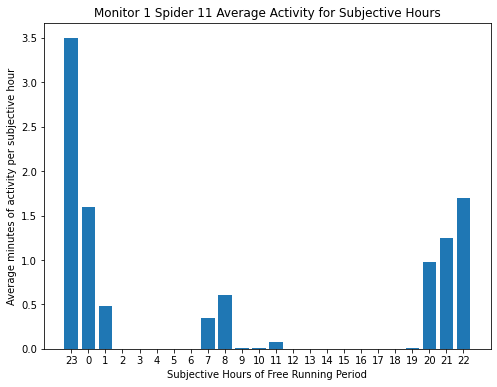

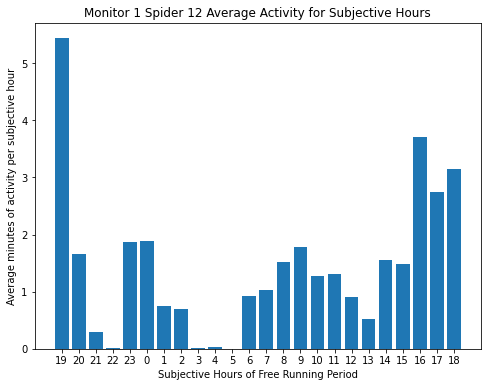

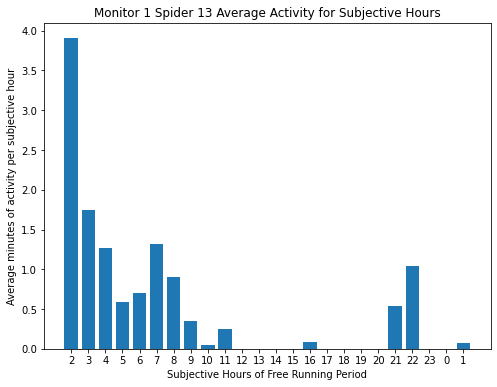

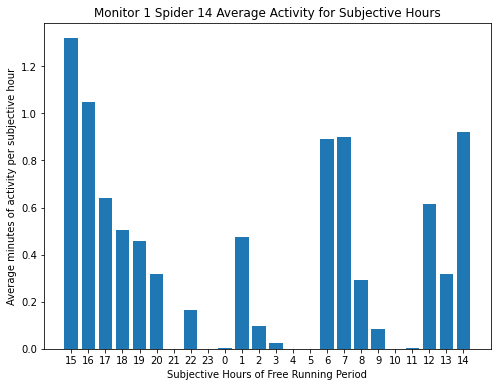

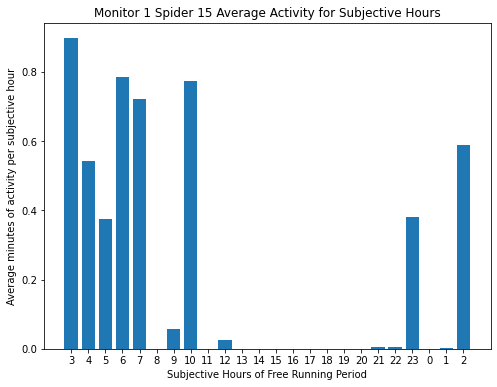

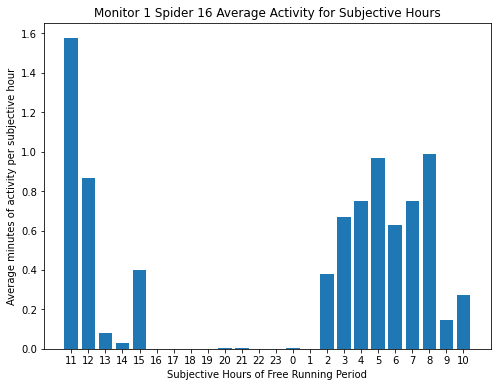

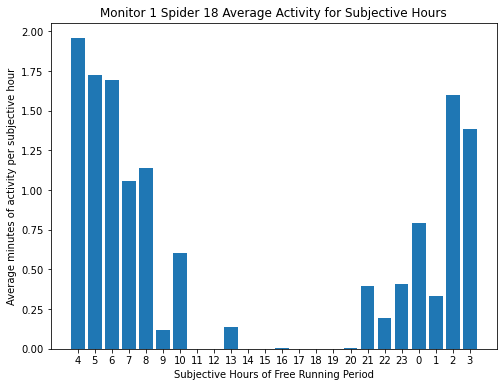

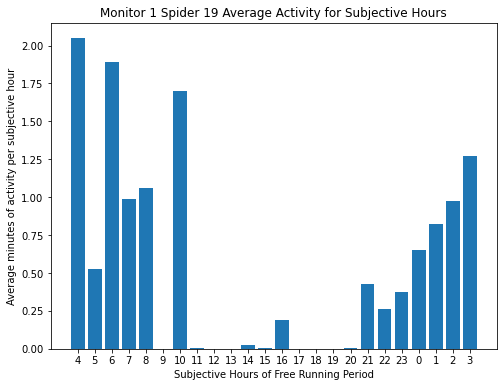

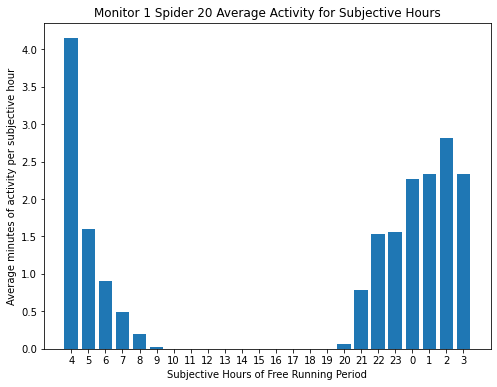

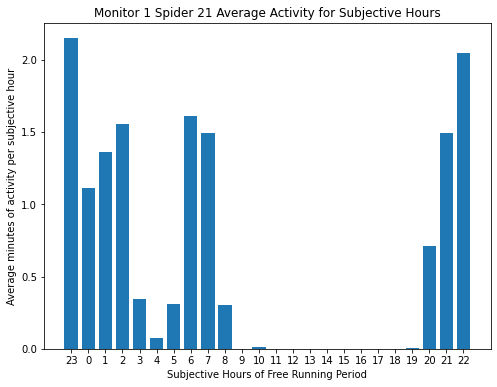

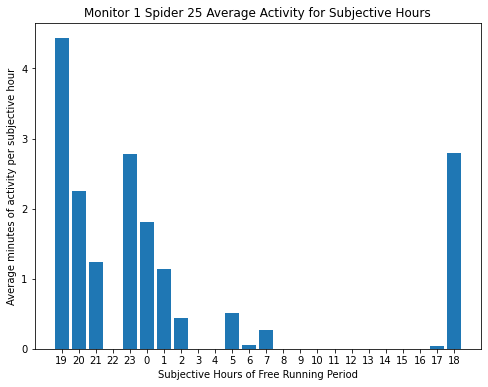

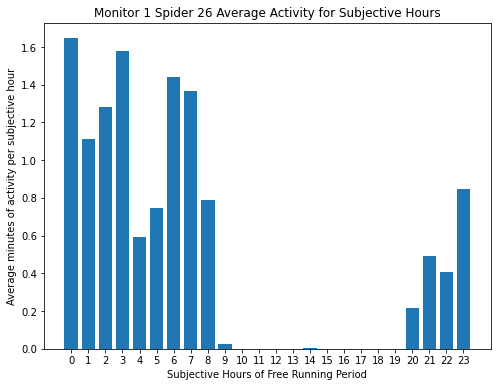

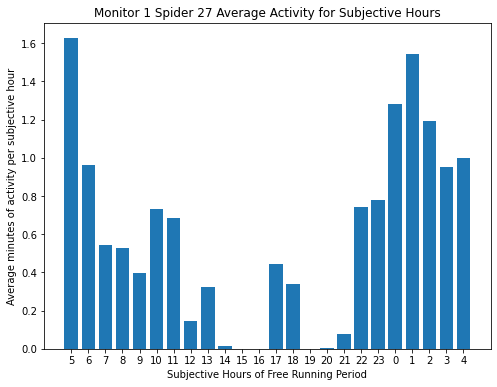

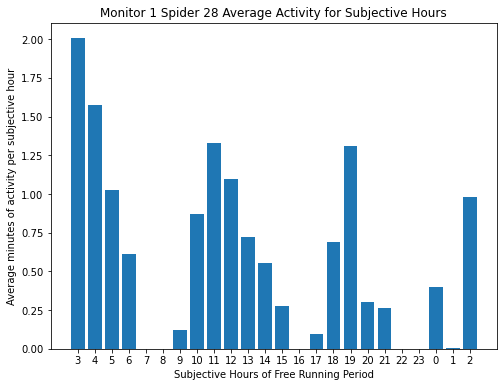

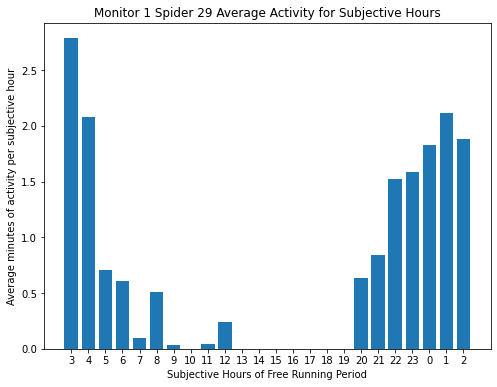

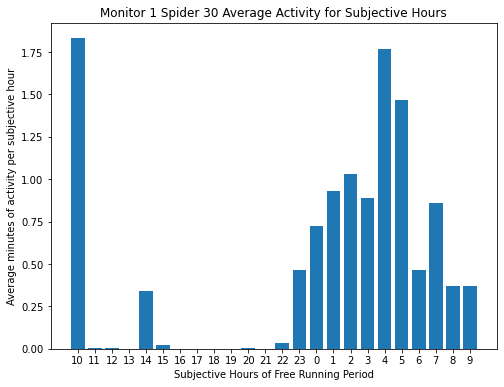

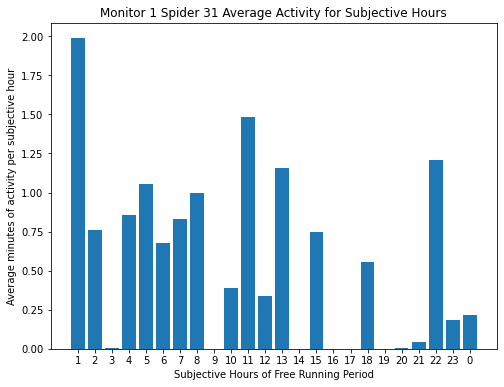

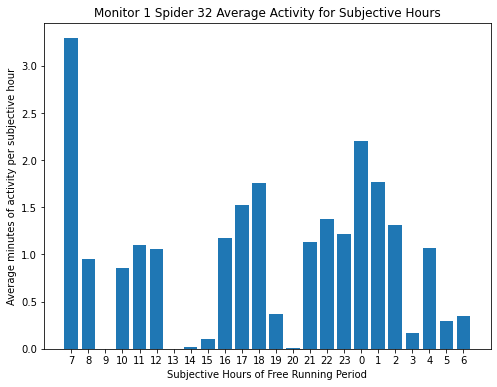

IndexError: index 28 is out of bounds for axis 0 with size 28

In [59]:
average_subjective_activity_max_first(dflight, perT)

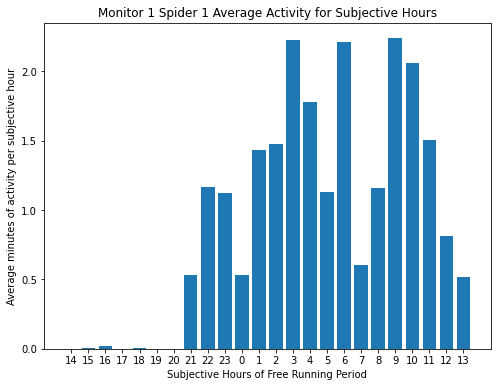

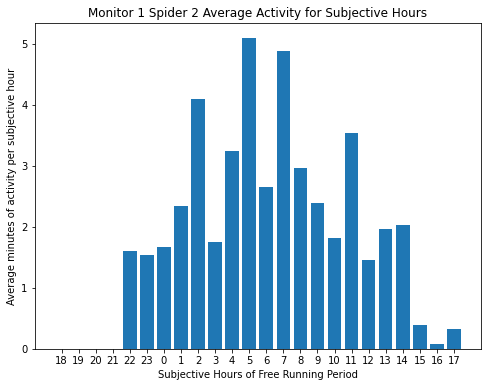

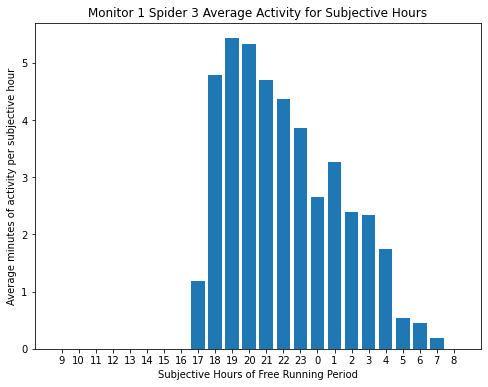

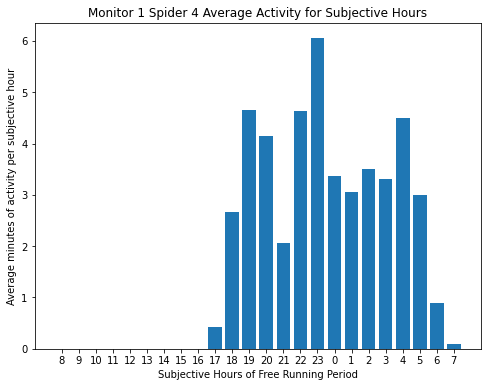

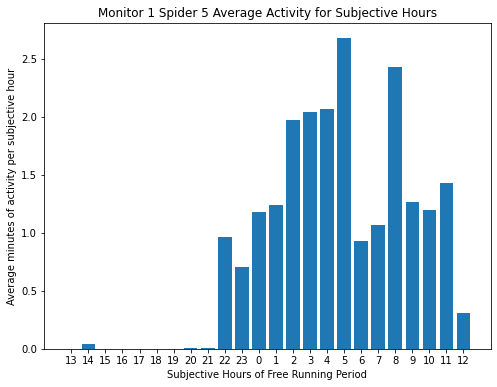

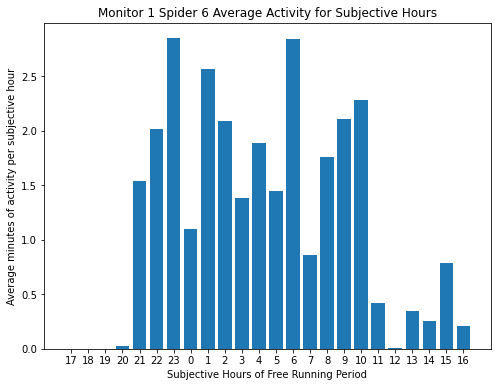

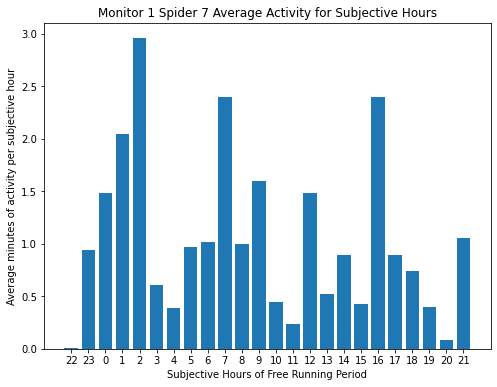

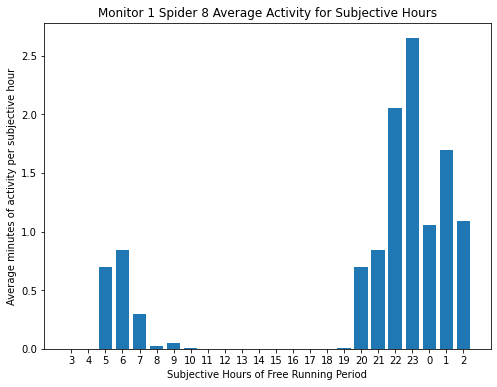

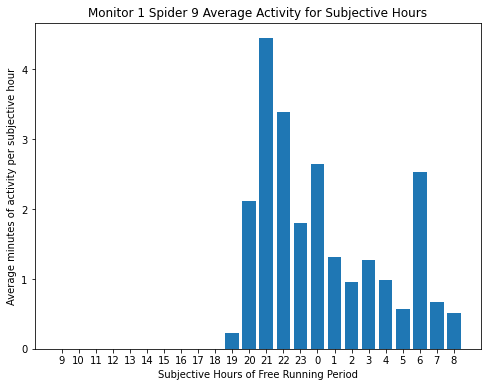

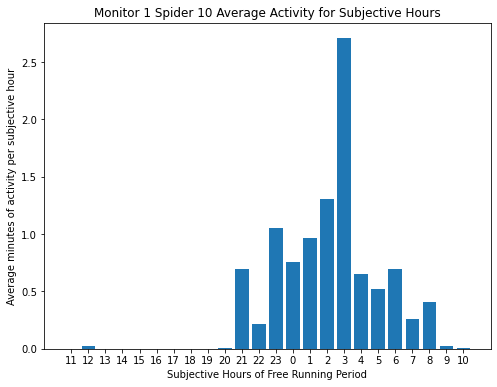

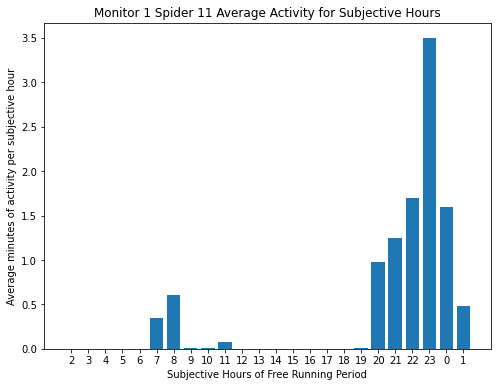

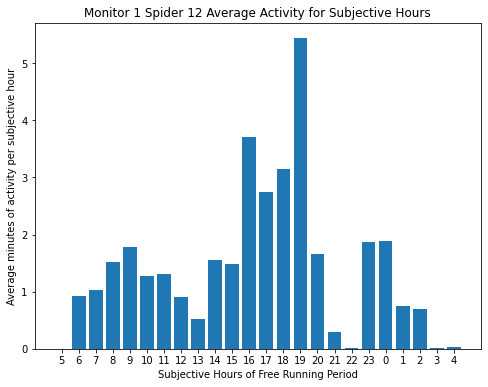

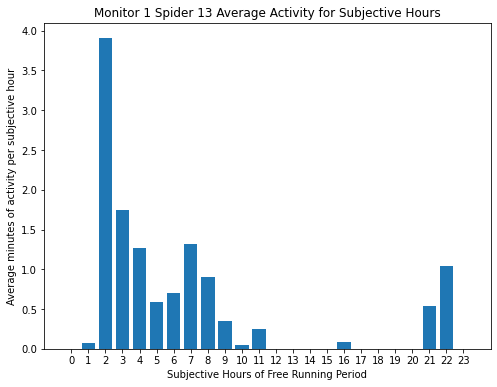

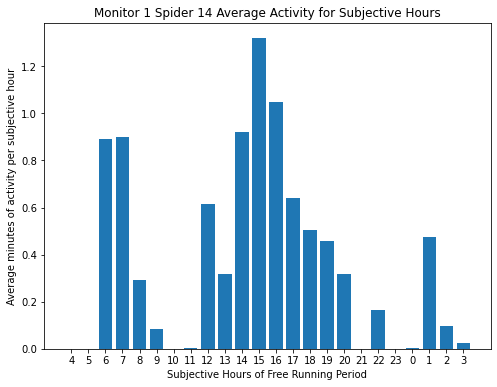

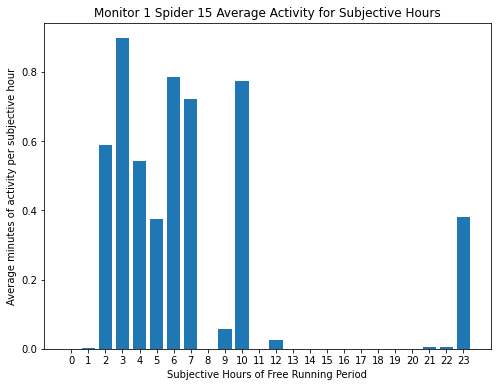

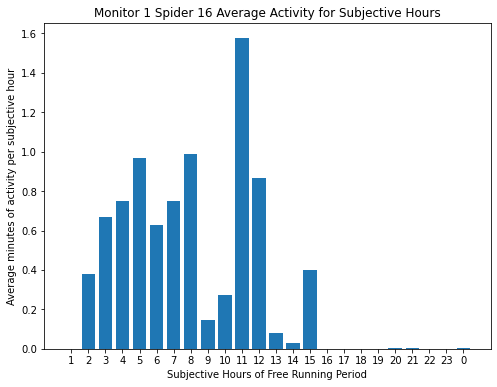

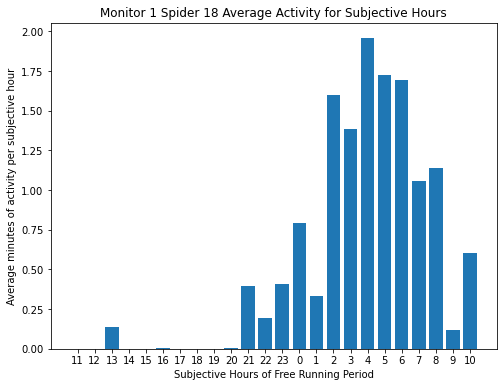

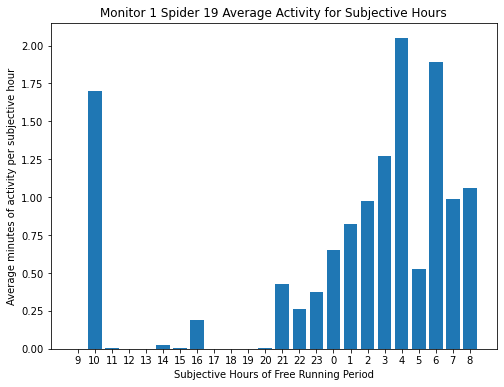

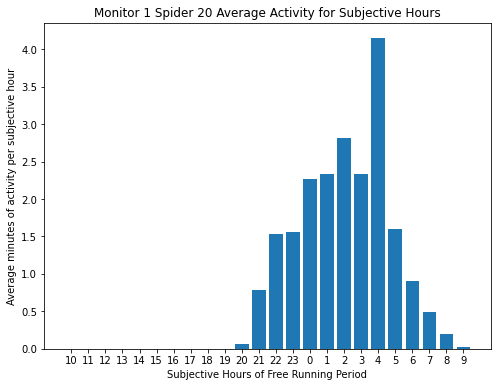

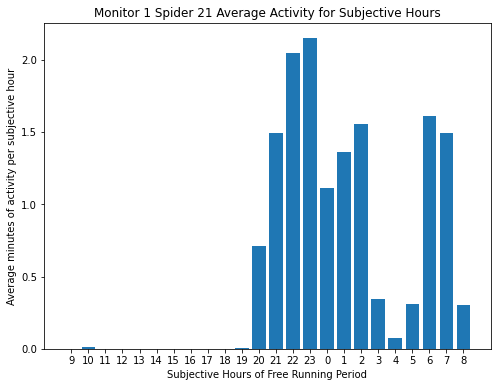

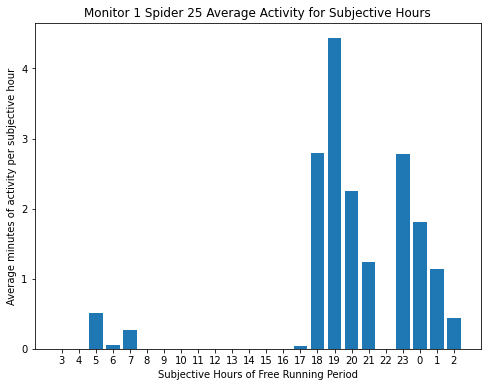

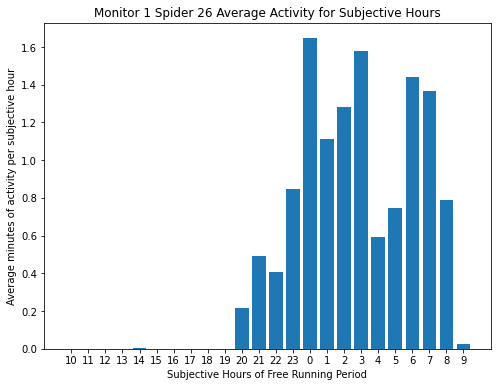

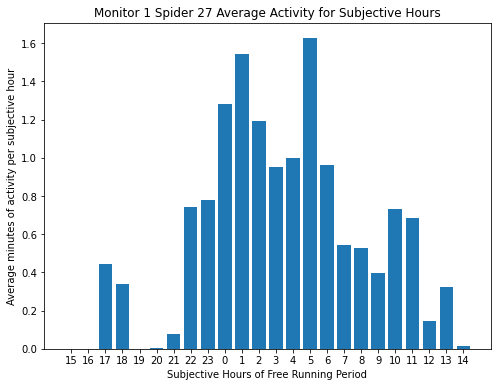

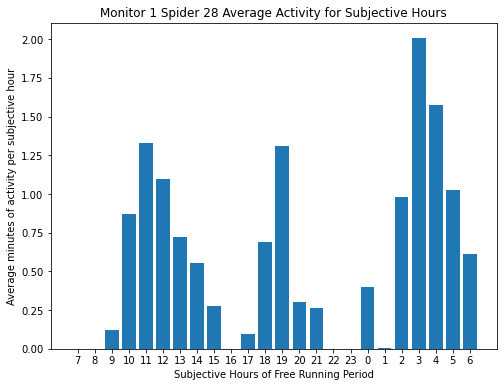

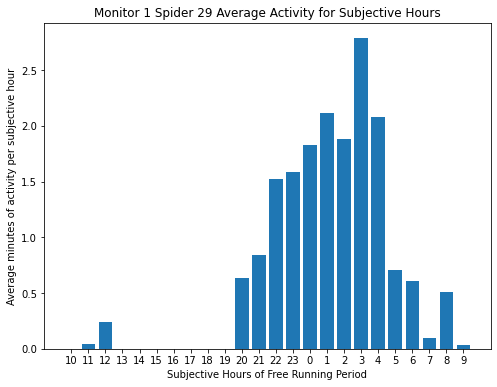

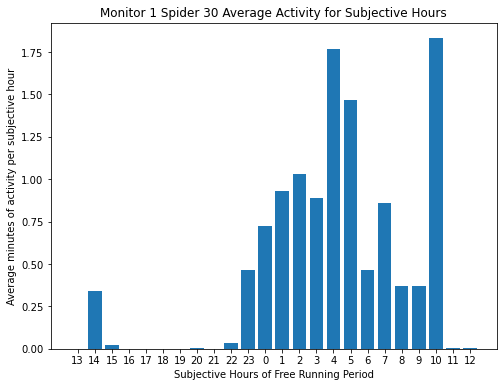

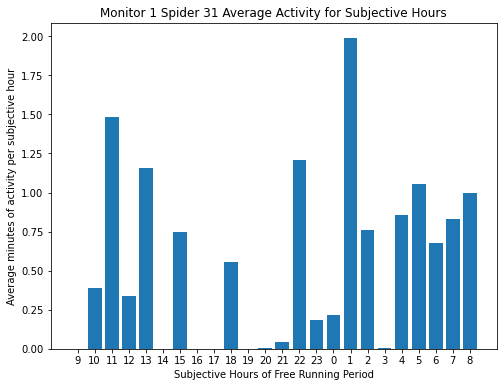

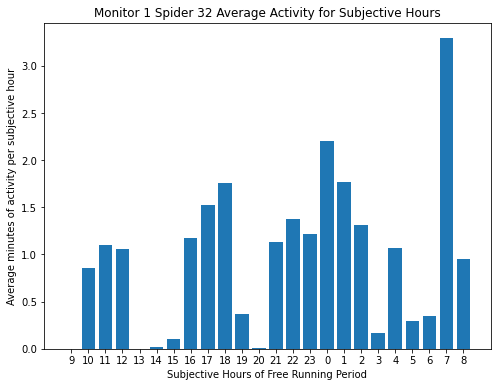

IndexError: index 28 is out of bounds for axis 0 with size 28

In [60]:
average_subjective_activity_min_first(dflight, perT)